In [1]:
import math, time, random, datetime

# data analysis and wrangling
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.5/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.5/u/import-error

In [ ]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

#import for interactive plotting
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
%matplotlib inline

In [ ]:
# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler

In [ ]:
# machine learning
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron,SGDClassifier,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV, learning_curve, cross_val_score
from catboost import CatBoostClassifier, Pool, cv

In [ ]:
# ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Import and Inspect Data

In [ ]:
df = pd.read_csv("Data/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [ ]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [ ]:
df.shape

(1470, 35)

# Exploratory Data Analysis

In [ ]:
ProfileReport(df)

- Job level is strongly correlated with total working hours
- Monthly income is strongly correlated with Job level
- Monthly income is strongly correlated with total working hours
- Age is stongly correlated with monthly income

In [ ]:
# drop the unnecessary columns
df.drop(['EmployeeNumber','Over18','StandardHours','EmployeeCount'],axis=1,inplace=True)

In [ ]:
df['Attrition'] = df['Attrition'].apply(lambda x:1 if x == "Yes" else 0 )
df['OverTime'] = df['OverTime'].apply(lambda x:1 if x =="Yes" else 0 )

In [ ]:
attrition = df[df['Attrition'] == 1]
no_attrition = df[df['Attrition']==0]

### Visualization of Categorical Features 

In [ ]:
def categorical_column_viz(col_name):
    
    f,ax = plt.subplots(1,2, figsize=(10,6))
  
    # Count Plot
    df[col_name].value_counts().plot.bar(cmap='Set2',ax=ax[0])
    ax[1].set_title(f'Number of Employee by {col_name}')
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(f'{col_name}')
    
    # Attrition Count per factors
    sns.countplot(col_name, hue='Attrition',data=df, ax=ax[1], palette='Set2')
    ax[1].set_title(f'Attrition by {col_name}')
    ax[1].set_xlabel(f'{col_name}')
    ax[1].set_ylabel('Count')

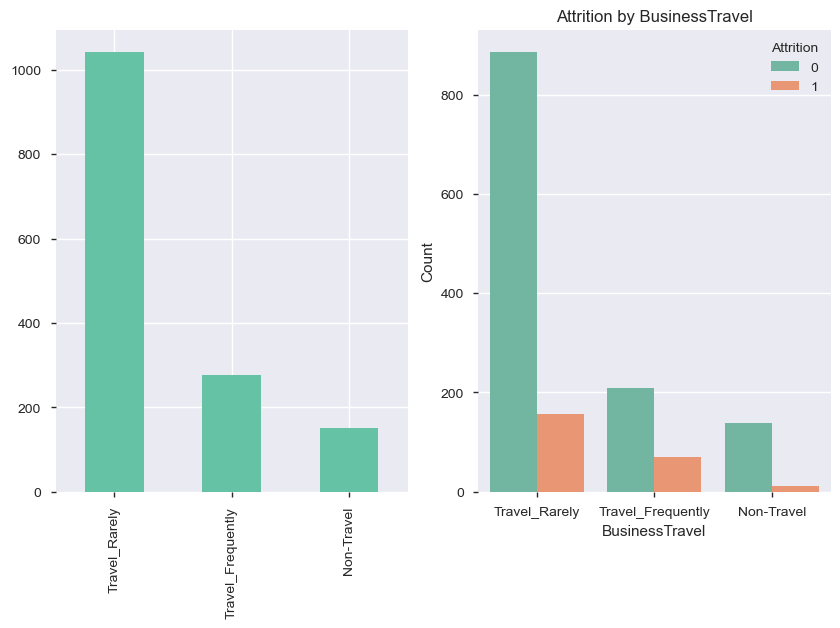

In [ ]:
categorical_column_viz('BusinessTravel')

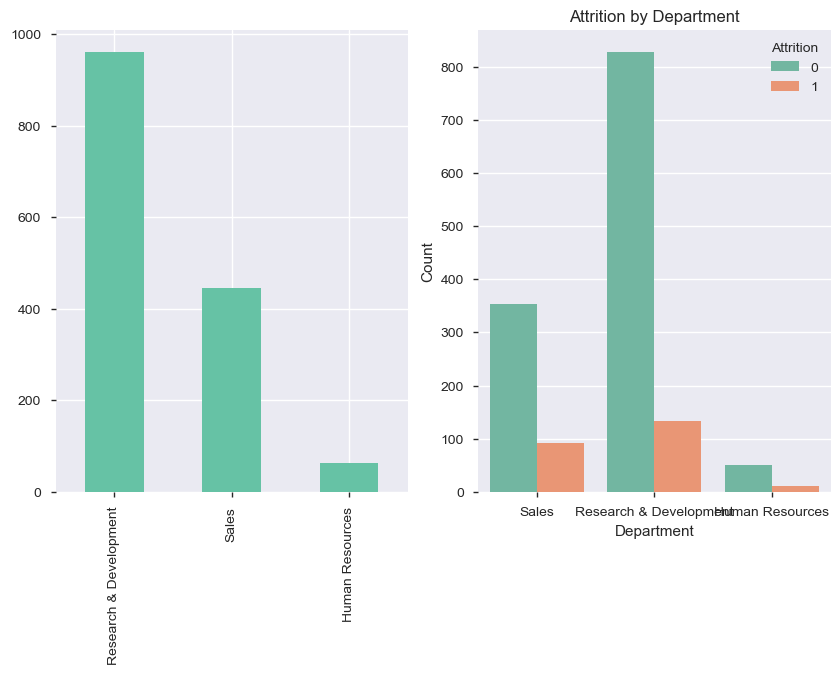

In [ ]:
categorical_column_viz('Department')

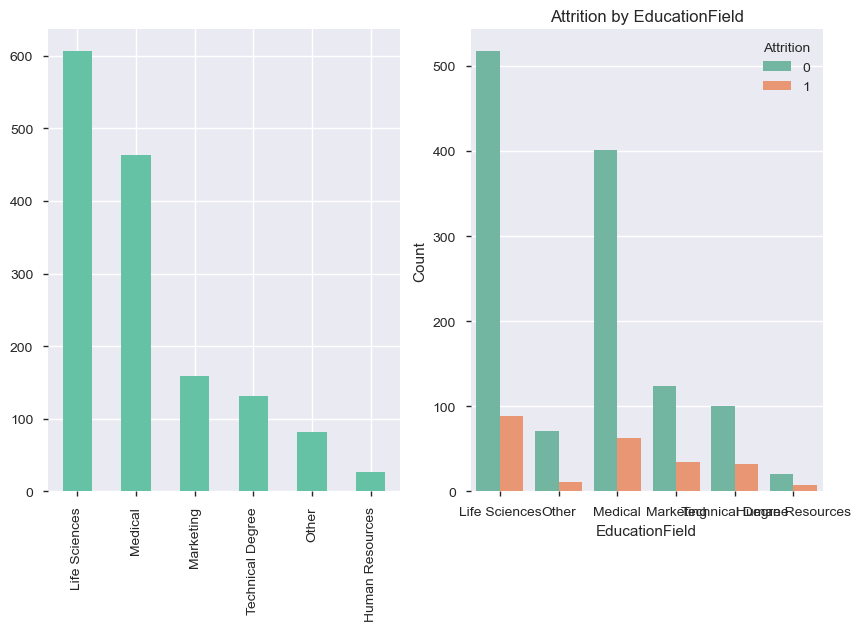

In [ ]:
categorical_column_viz('EducationField')

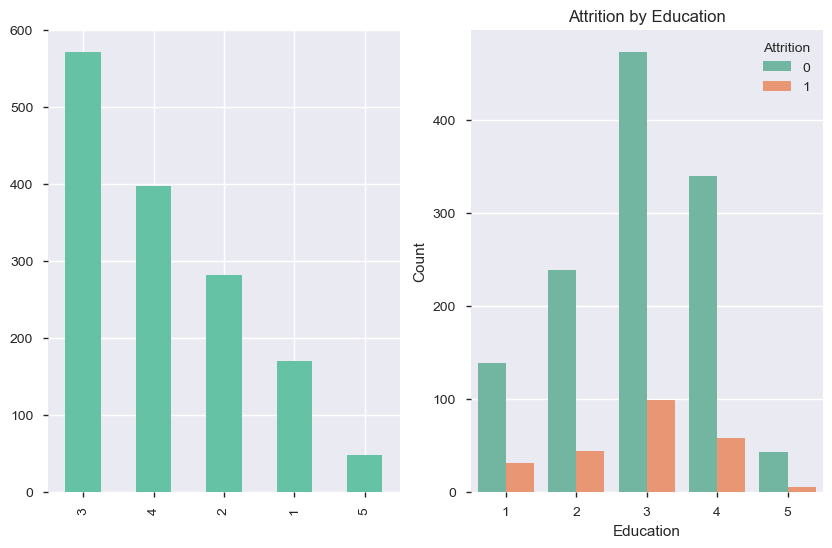

In [ ]:
categorical_column_viz('Education')

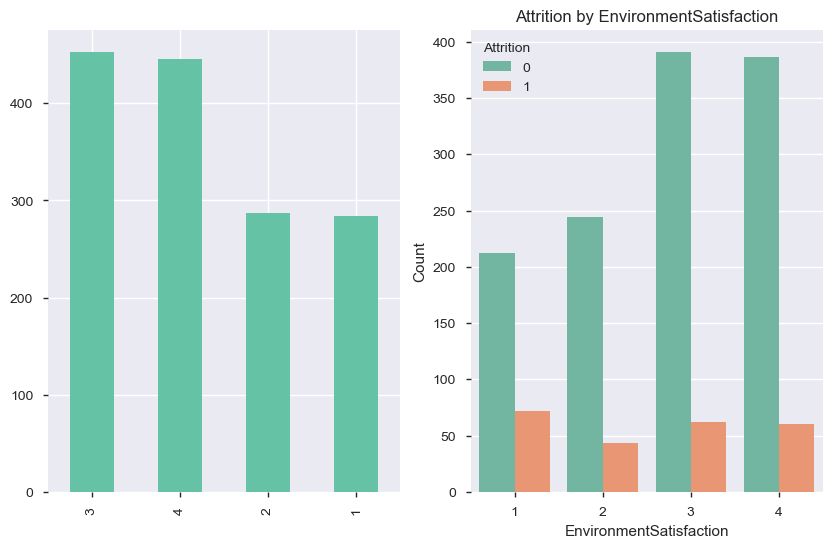

In [ ]:
categorical_column_viz('EnvironmentSatisfaction')

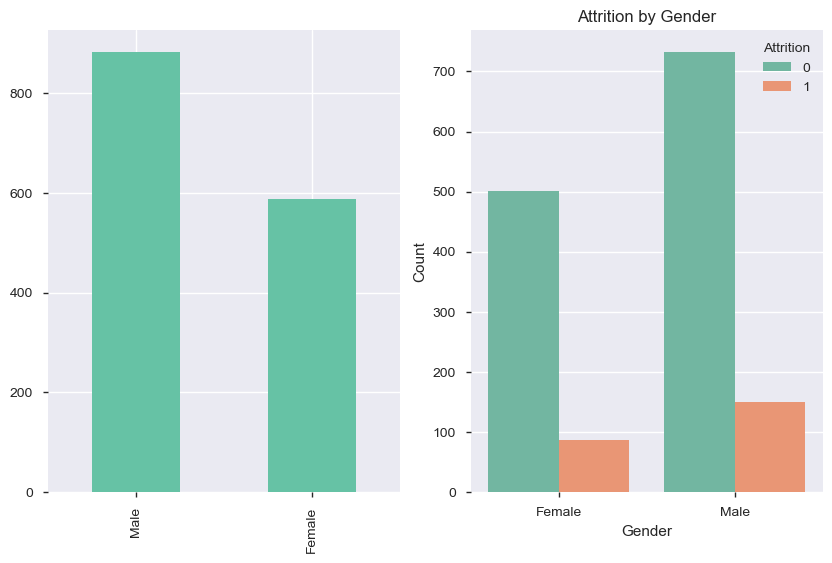

In [ ]:
categorical_column_viz('Gender')

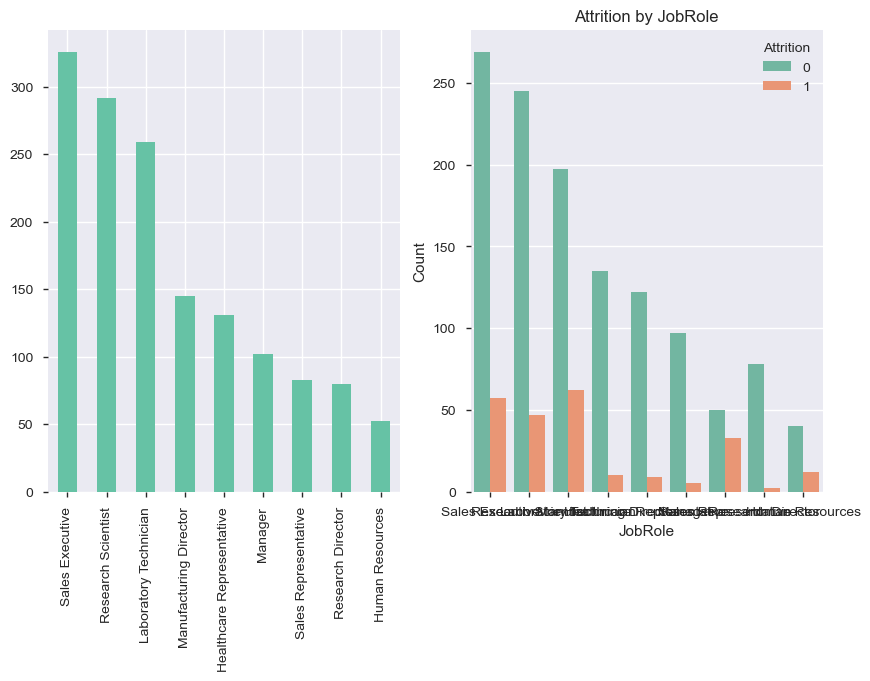

In [ ]:
categorical_column_viz('JobRole')

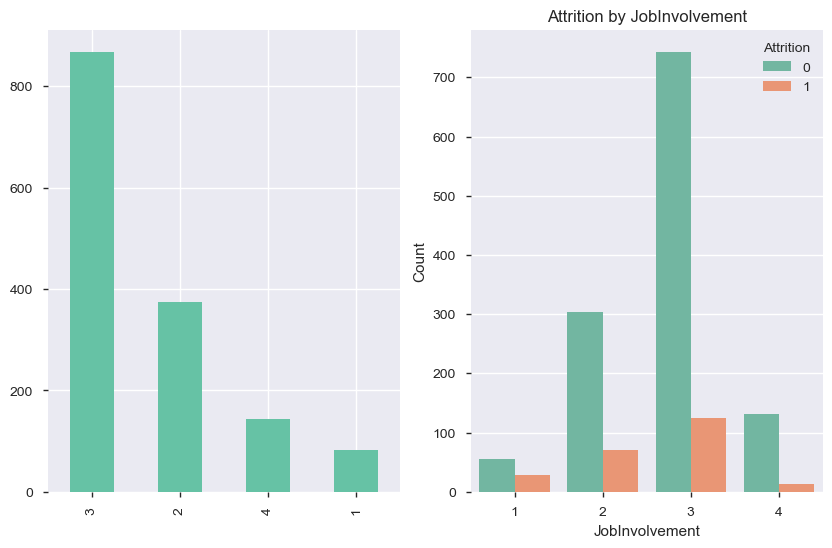

In [ ]:
categorical_column_viz('JobInvolvement')

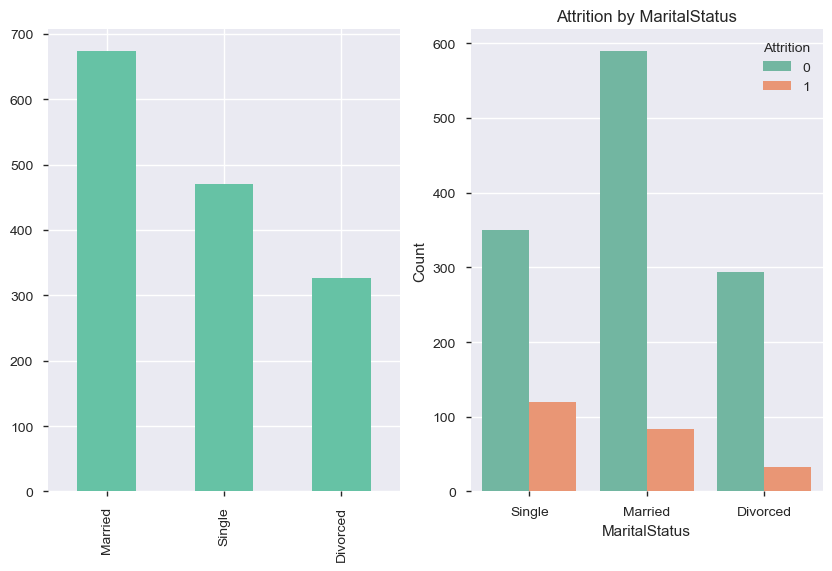

In [ ]:
categorical_column_viz('MaritalStatus')

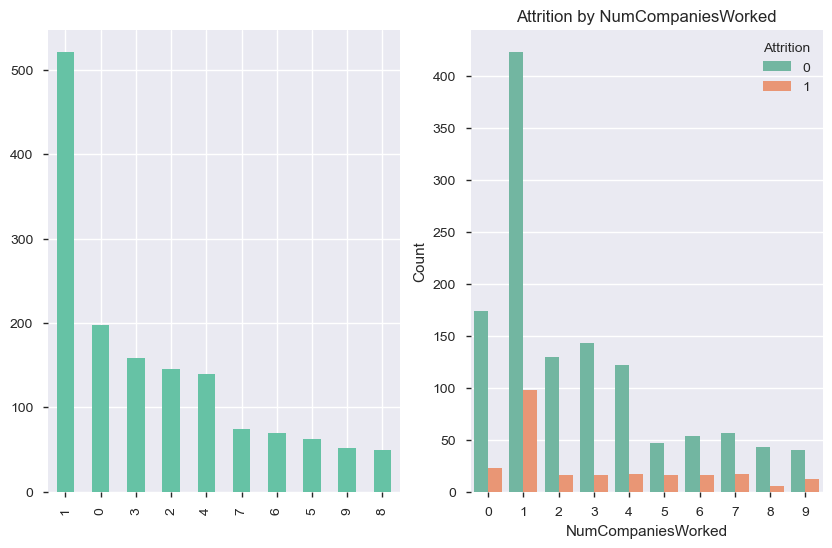

In [ ]:
categorical_column_viz('NumCompaniesWorked')

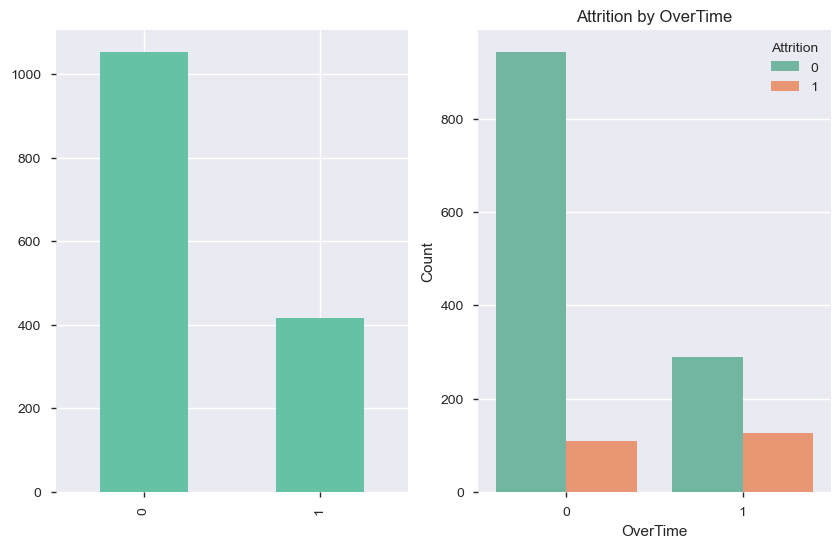

In [ ]:
categorical_column_viz('OverTime')

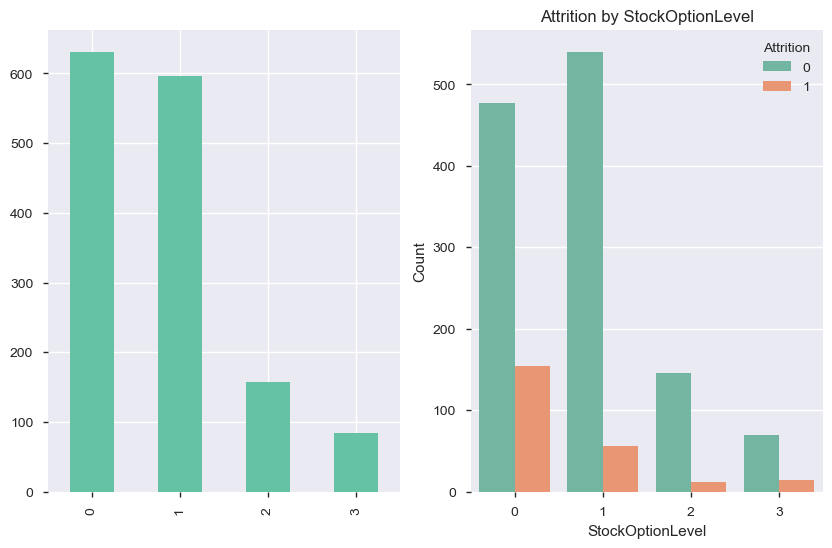

In [ ]:
categorical_column_viz('StockOptionLevel')

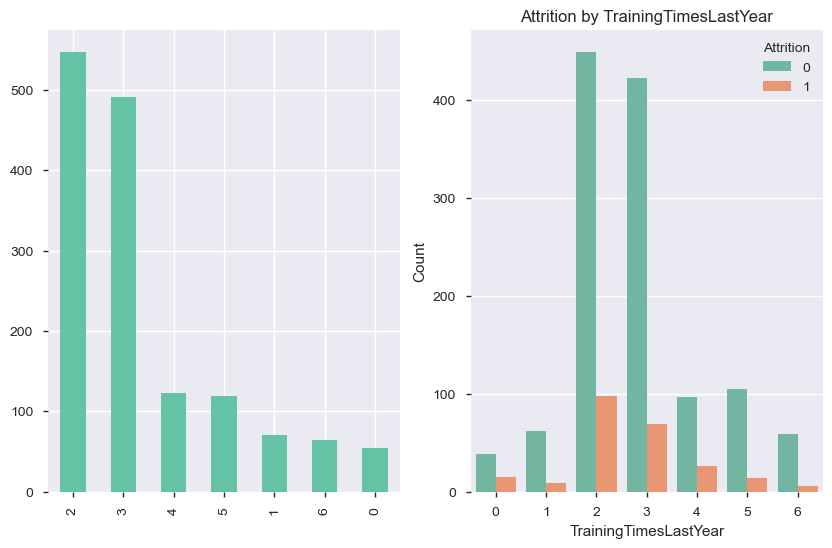

In [ ]:
categorical_column_viz('TrainingTimesLastYear')

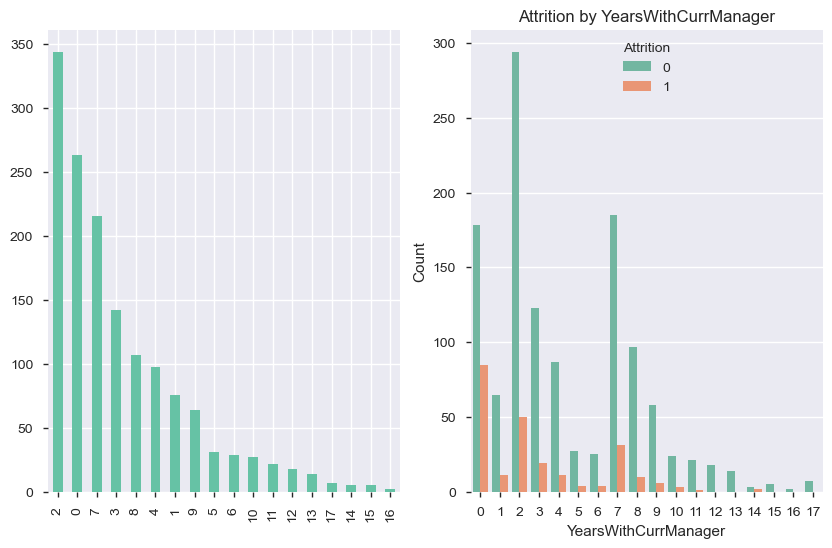

In [ ]:
categorical_column_viz('YearsWithCurrManager')

### Visualization of Numerical Features 

In [ ]:
def numerical_column_viz(col_name):
    f,ax = plt.subplots(1,2, figsize=(18,6))
    sns.kdeplot(attrition[col_name], label='Employee who left',ax=ax[0], shade=True, color='palegreen')
    sns.kdeplot(no_attrition[col_name], label='Employee who stayed', ax=ax[0], shade=True, color='salmon')
    
    sns.boxplot(y=col_name, x='Attrition',data=df, palette='Set3', ax=ax[1])

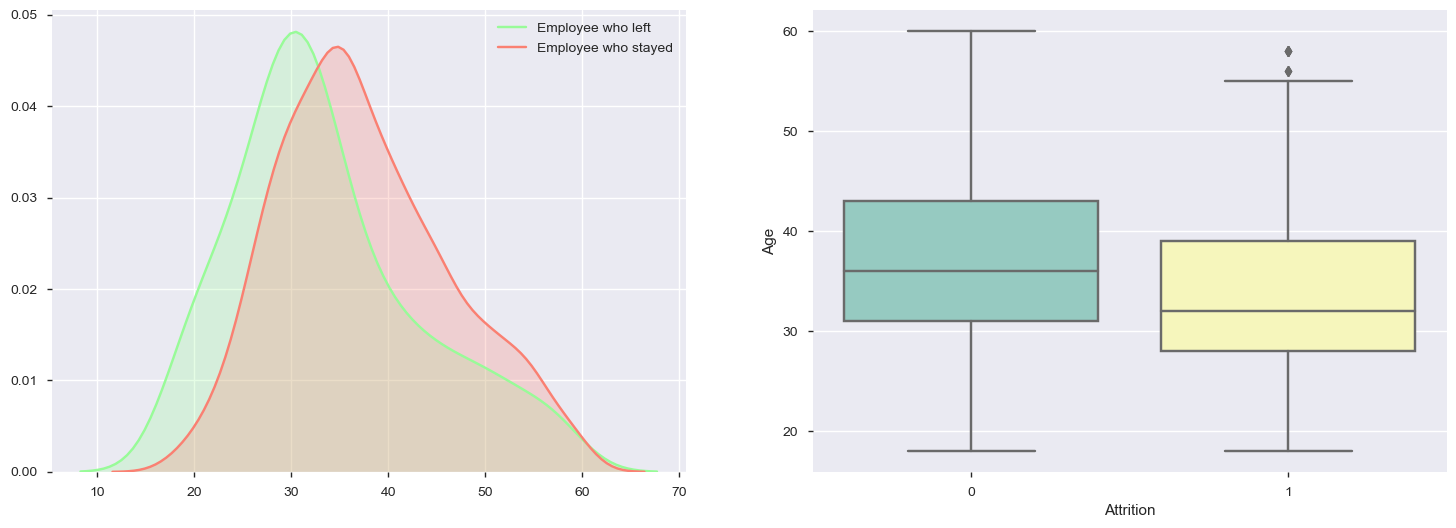

In [ ]:
numerical_column_viz("Age")

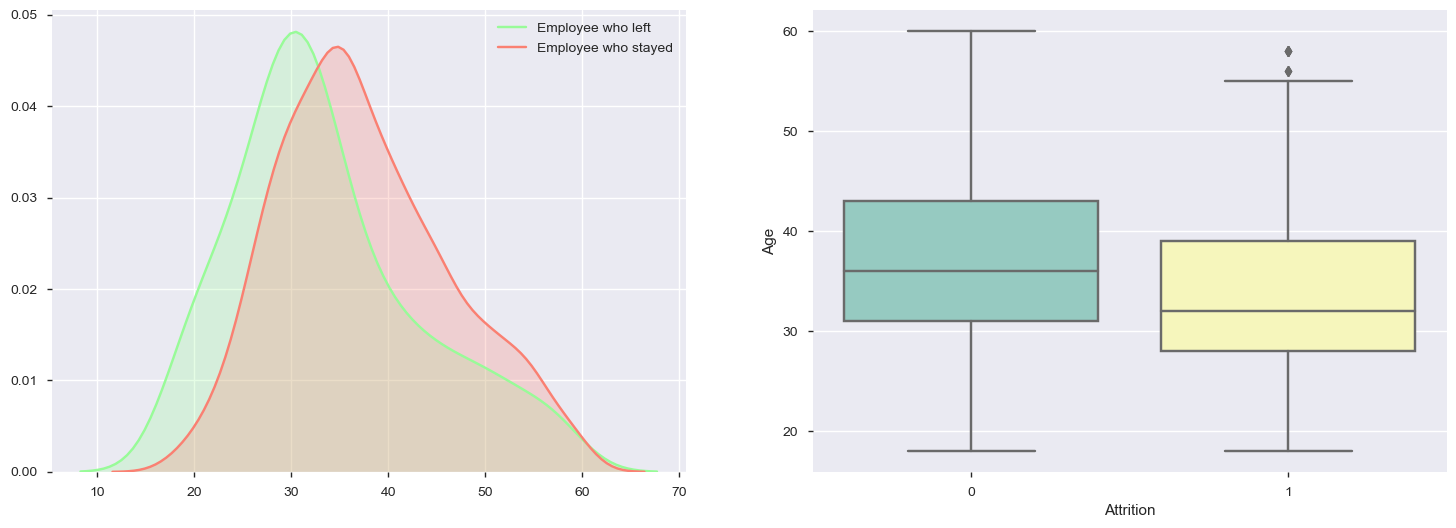

In [ ]:
numerical_column_viz("Age")

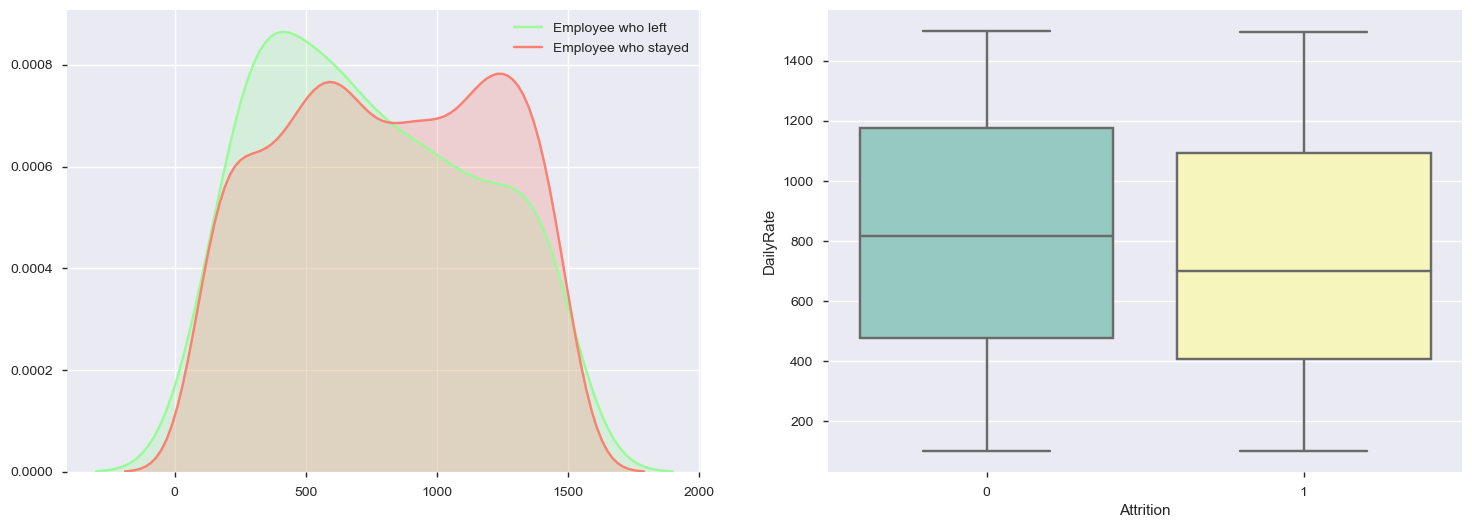

In [ ]:
numerical_column_viz("DailyRate")

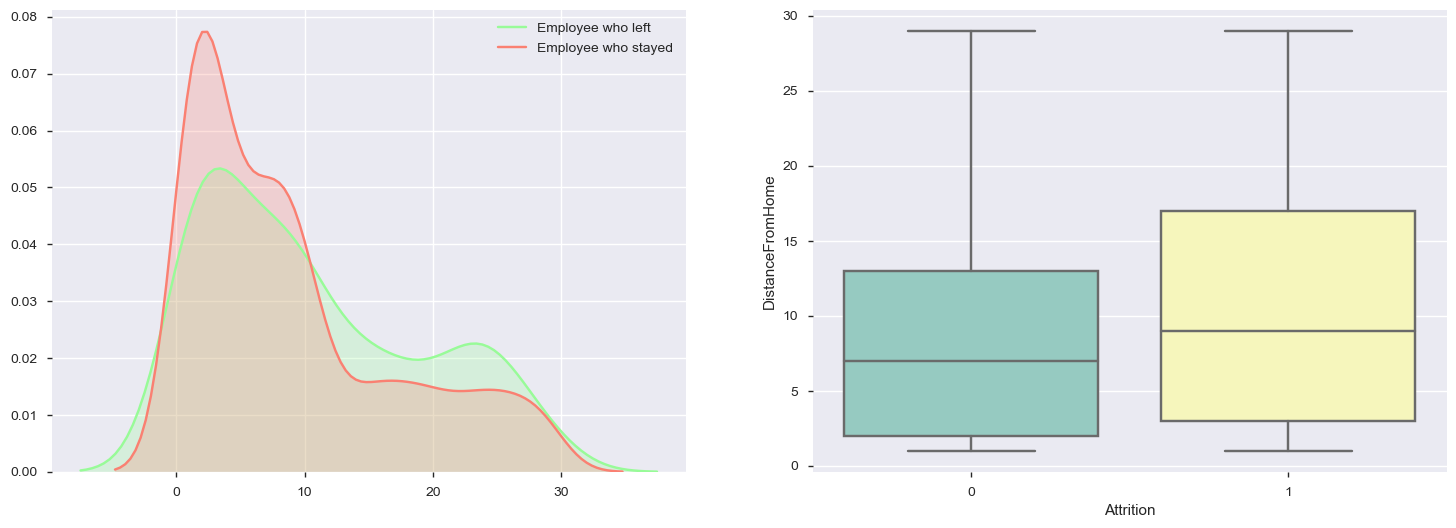

In [ ]:
numerical_column_viz("DistanceFromHome")

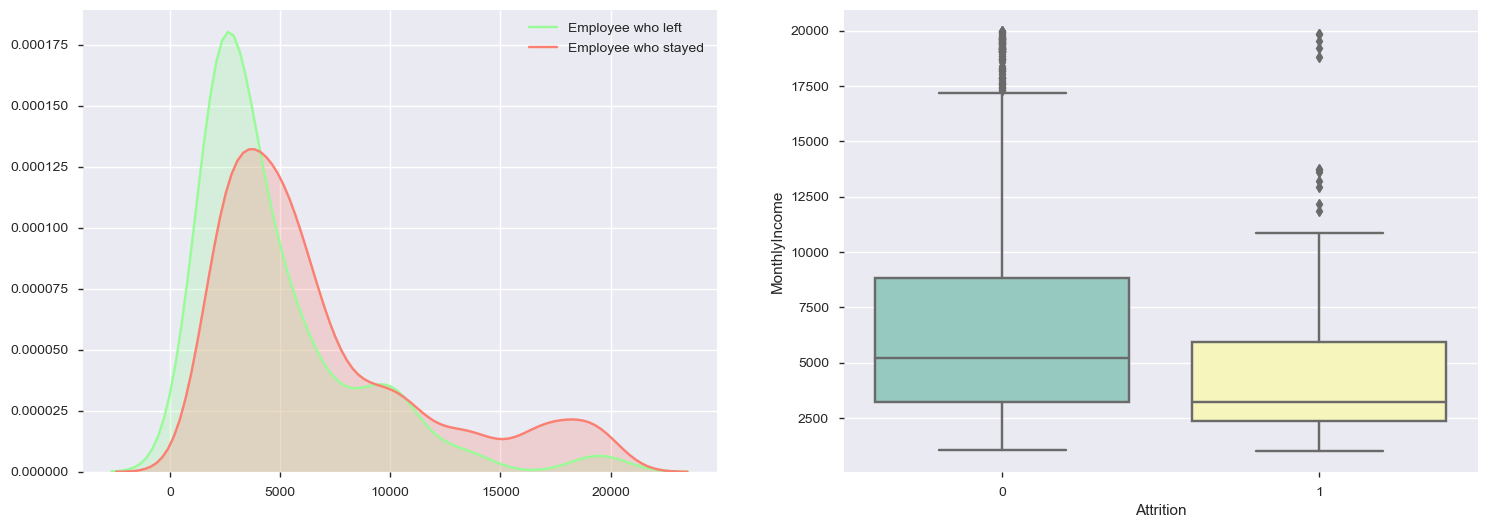

In [ ]:
numerical_column_viz("MonthlyIncome")

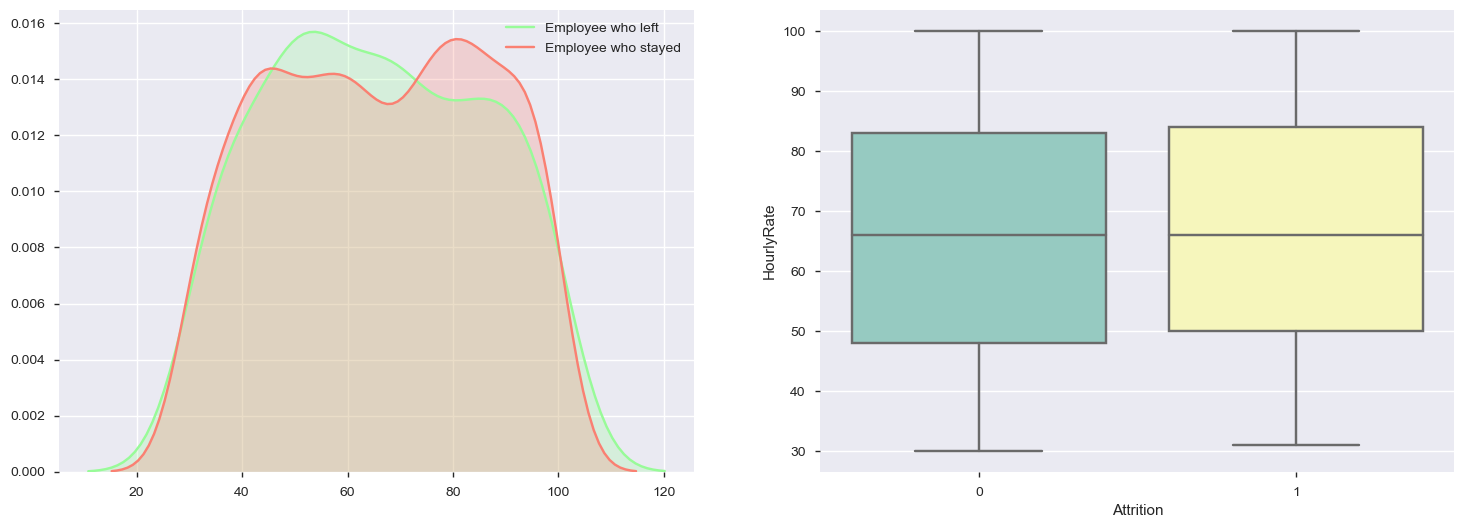

In [ ]:
numerical_column_viz("HourlyRate")

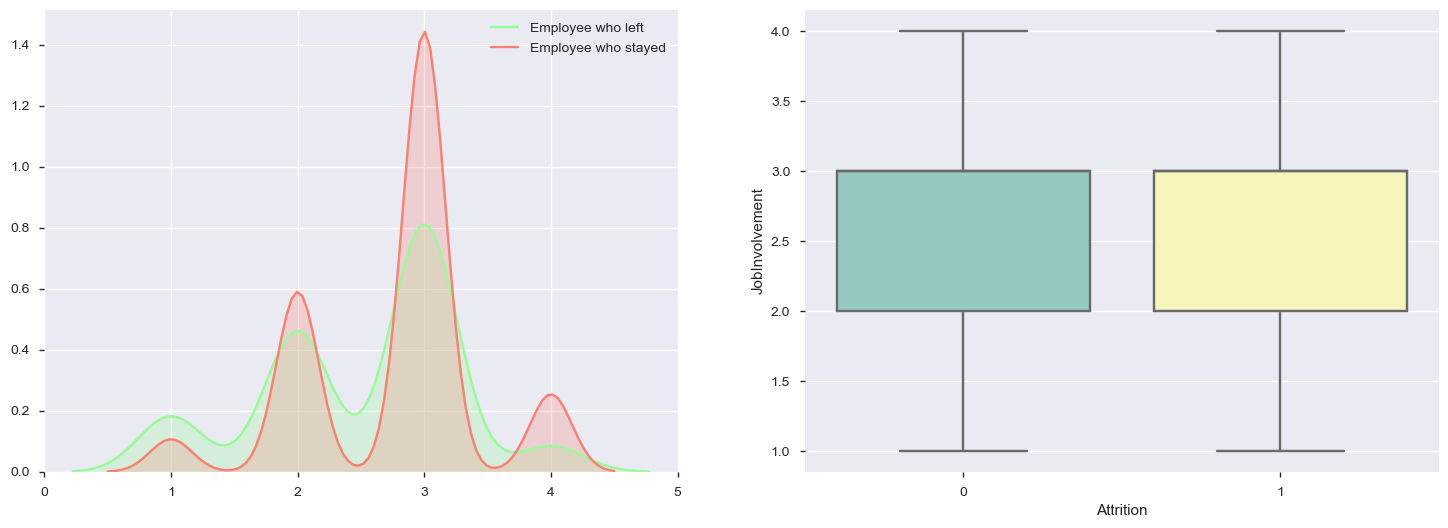

In [ ]:
numerical_column_viz("JobInvolvement")

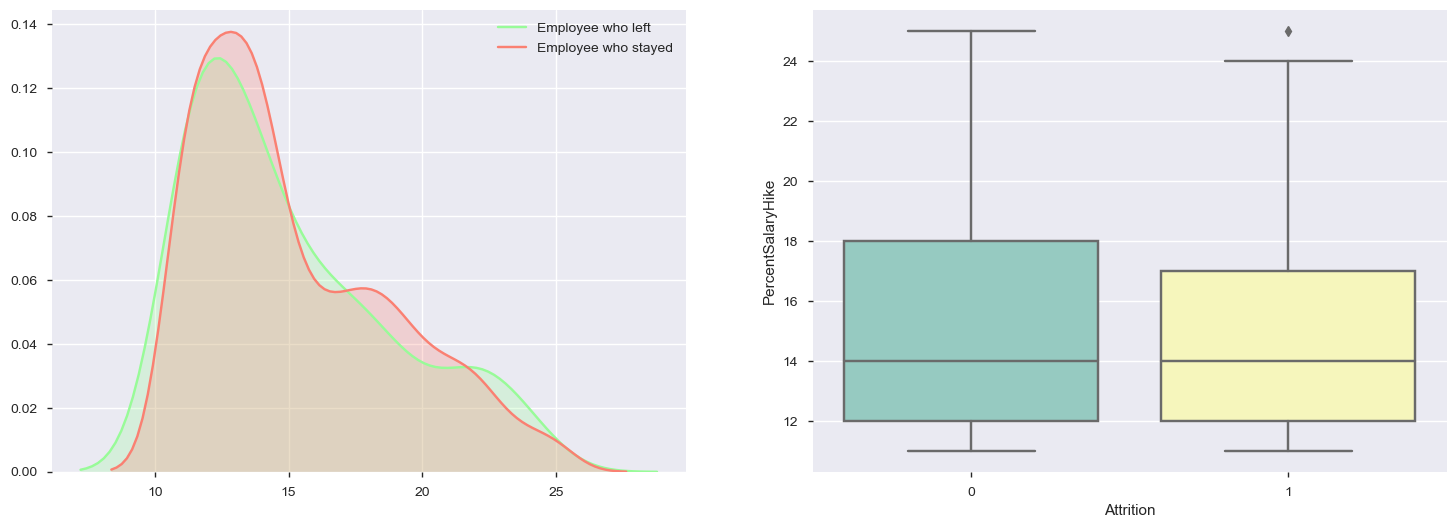

In [ ]:
numerical_column_viz("PercentSalaryHike")

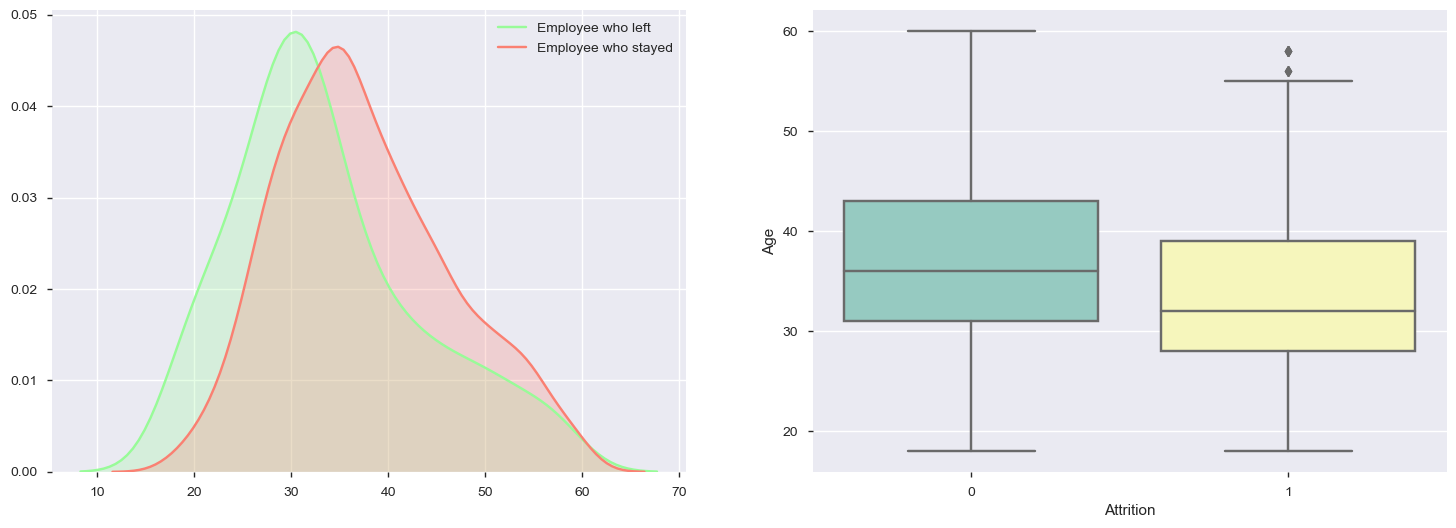

In [ ]:
numerical_column_viz("Age")

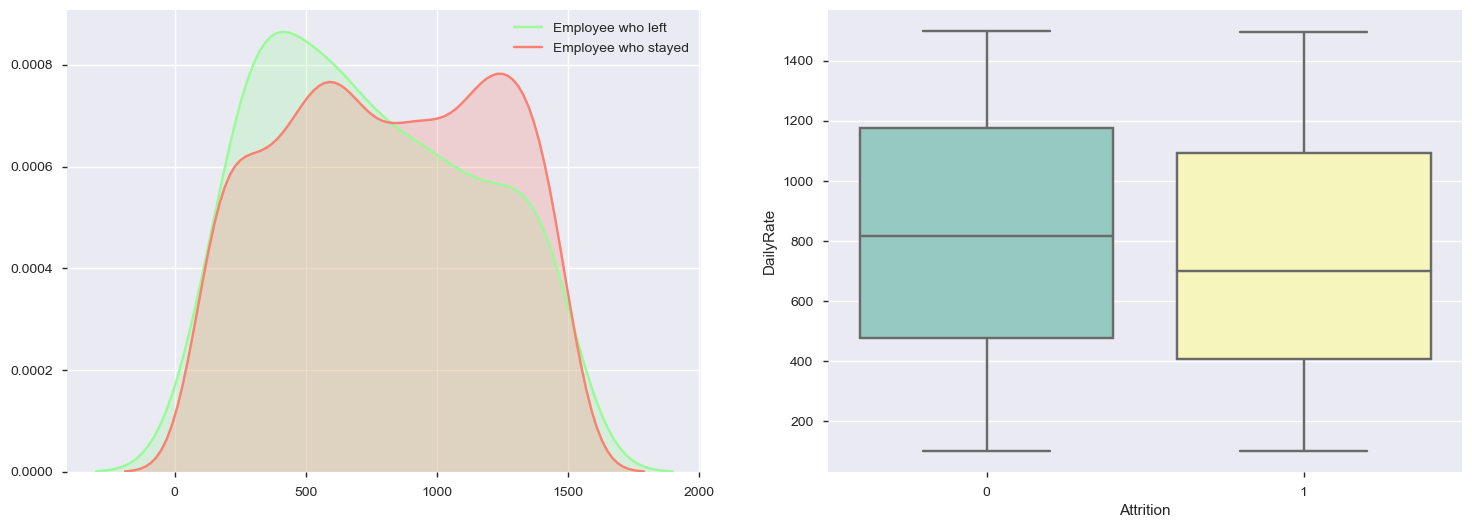

In [ ]:
numerical_column_viz("DailyRate")

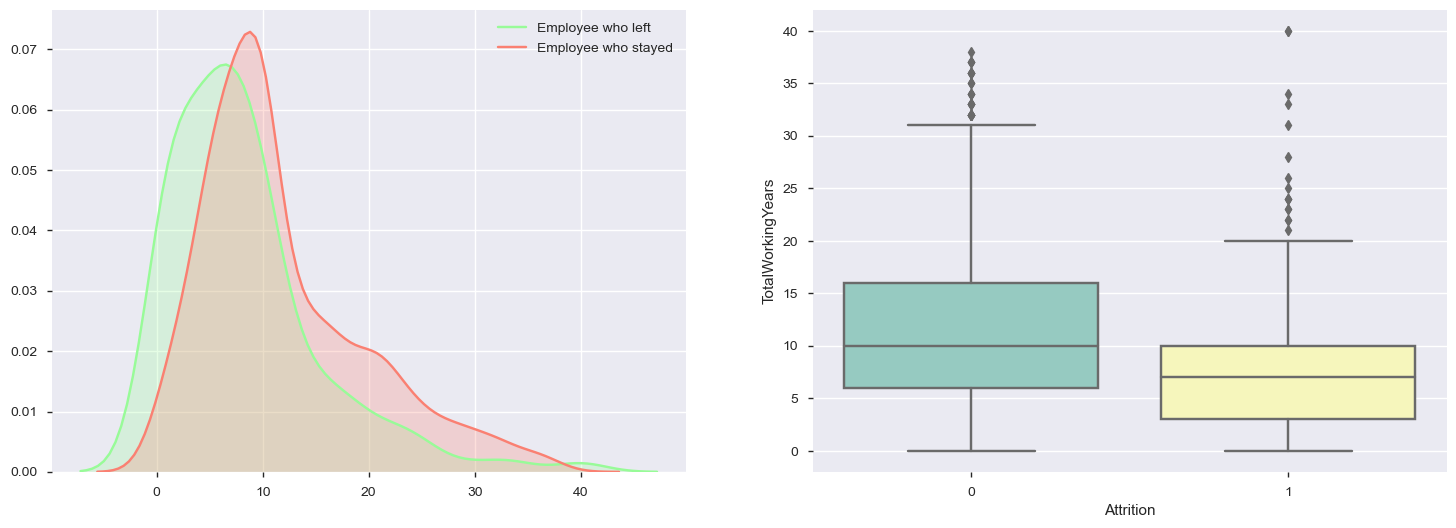

In [ ]:
numerical_column_viz("TotalWorkingYears")

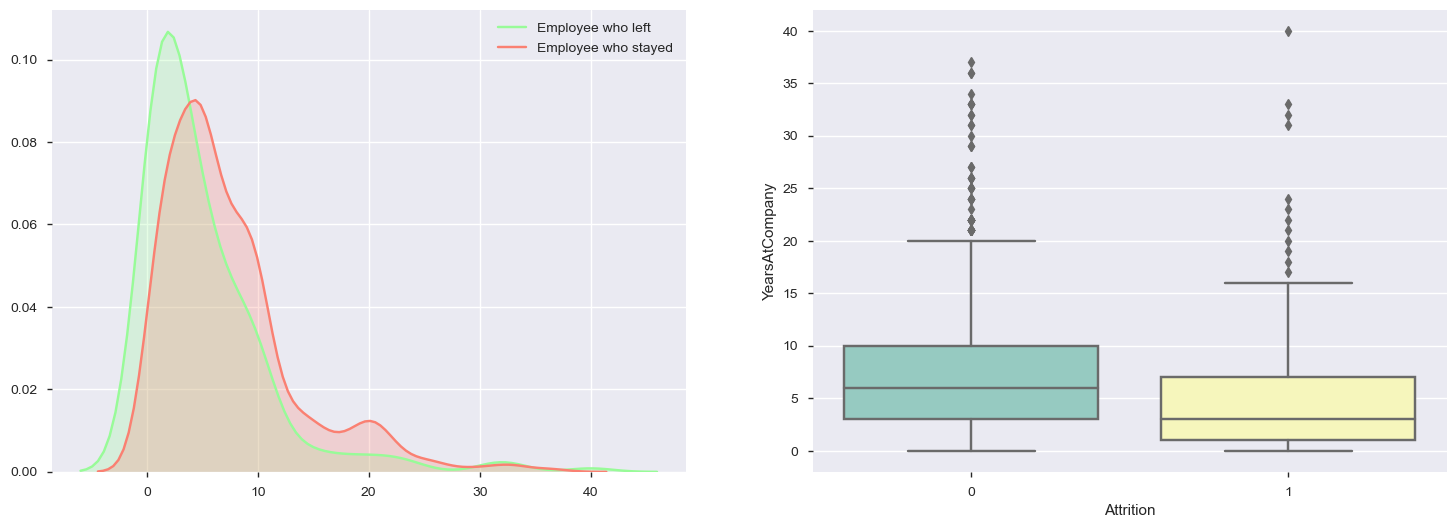

In [ ]:
numerical_column_viz("YearsAtCompany")

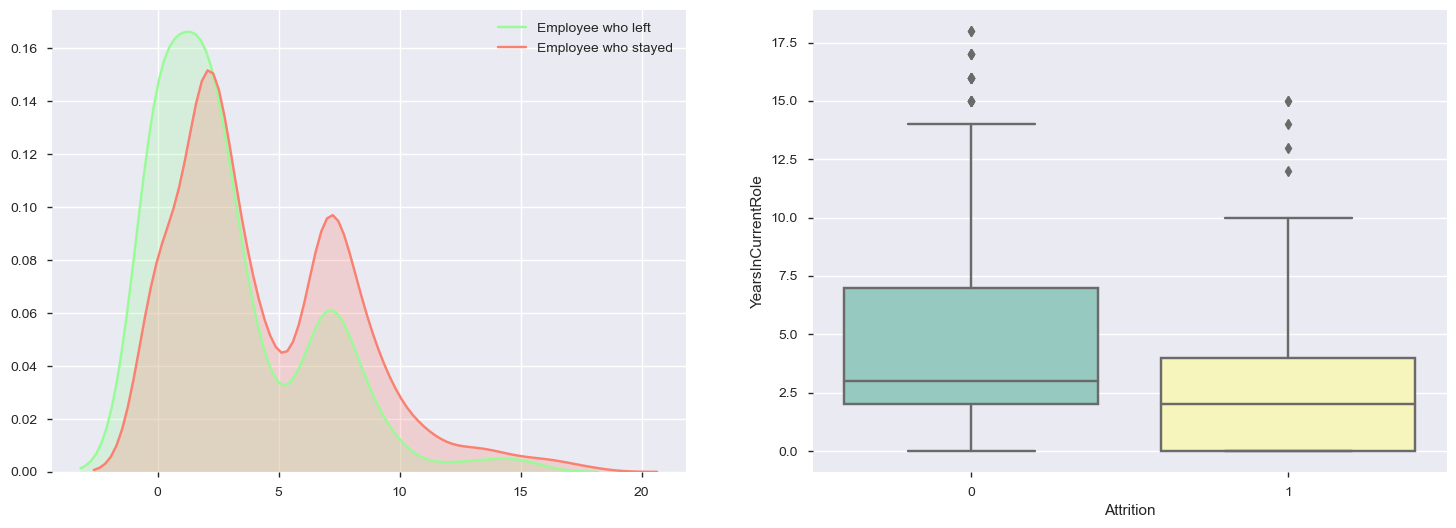

In [ ]:
numerical_column_viz("YearsInCurrentRole")

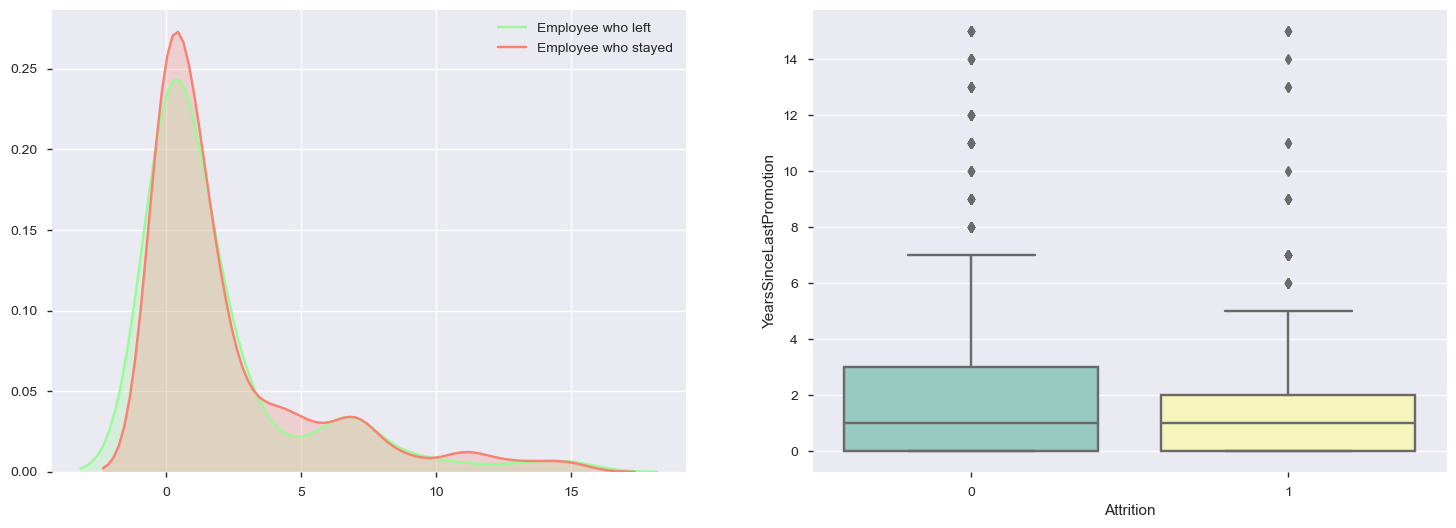

In [ ]:
numerical_column_viz("YearsSinceLastPromotion")

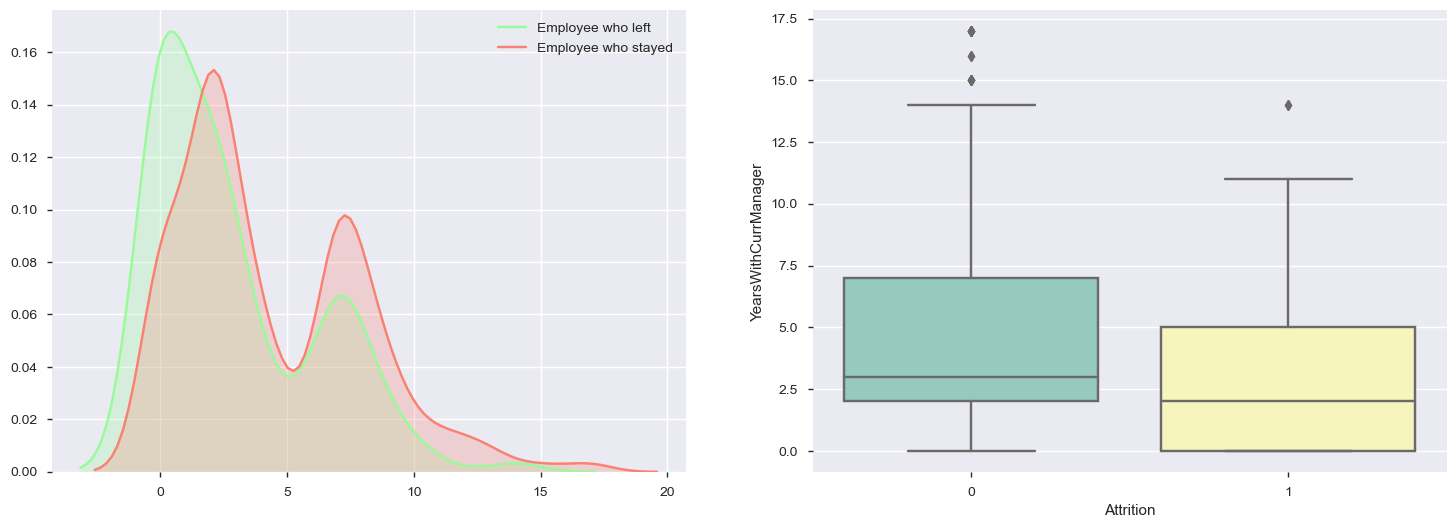

In [ ]:
numerical_column_viz("YearsWithCurrManager")

### Visualization of Categorical vs Numericals Features 

In [ ]:
def categorical_numerical(numerical_col, categorical_col1, categorical_col2):
    

    f,ax = plt.subplots(1,2, figsize=(20,8))
    
    g1= sns.swarmplot( categorical_col1, numerical_col,hue='Attrition', data=df, dodge=True, ax=ax[0], palette='Set2')
    ax[0].set_title(f'{numerical_col} vs {categorical_col1} separeted by Attrition')
    g1.set_xticklabels(g1.get_xticklabels(), rotation=90) 

    
    g2 = sns.swarmplot( categorical_col2, numerical_col,hue='Attrition', data=df, dodge=True, ax=ax[1], palette='Set2')
    ax[1].set_title(f'{numerical_col} vs {categorical_col1} separeted by Attrition')
    g2.set_xticklabels(g2.get_xticklabels(), rotation=90) 

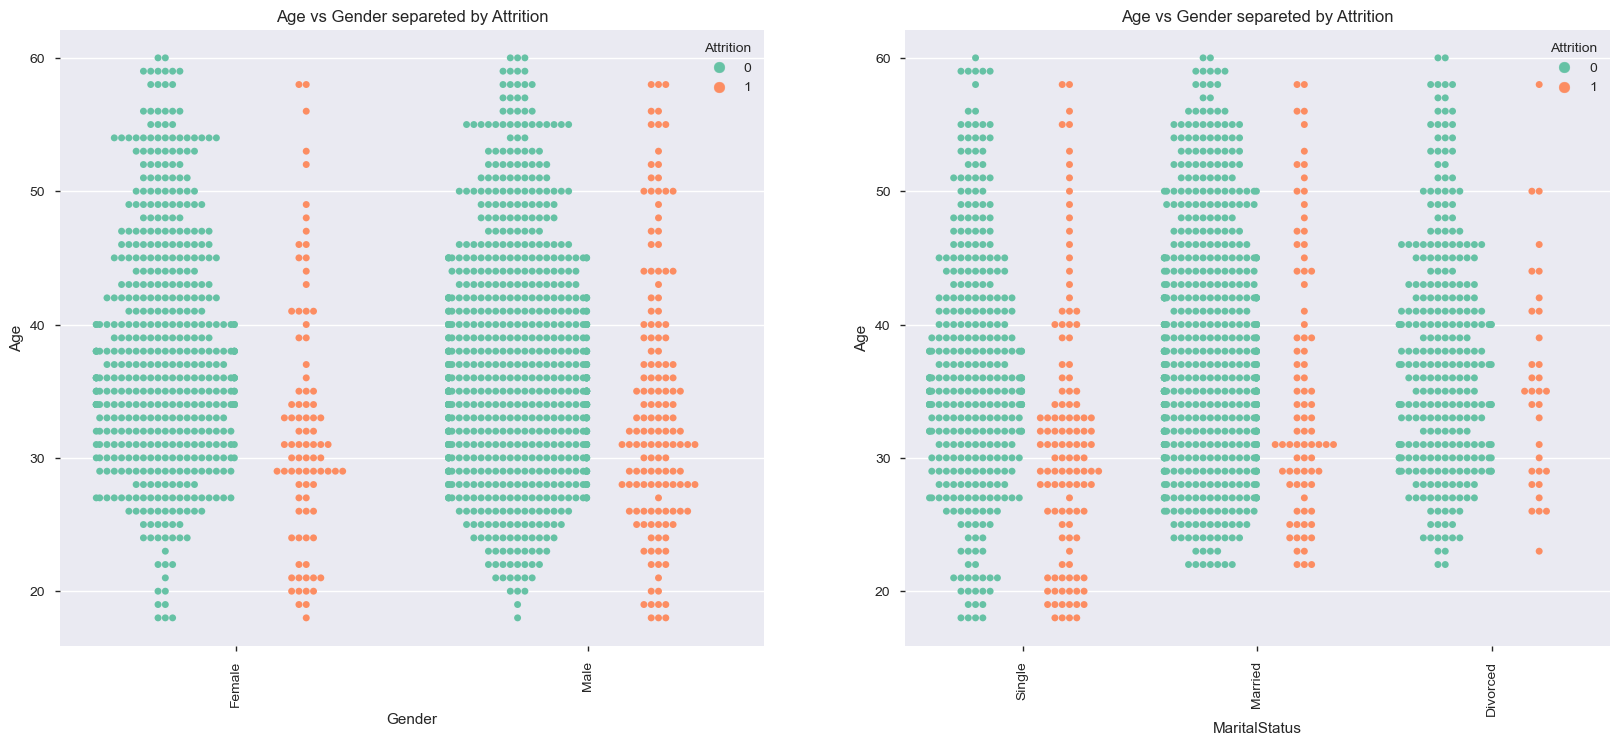

In [ ]:
categorical_numerical('Age','Gender','MaritalStatus')

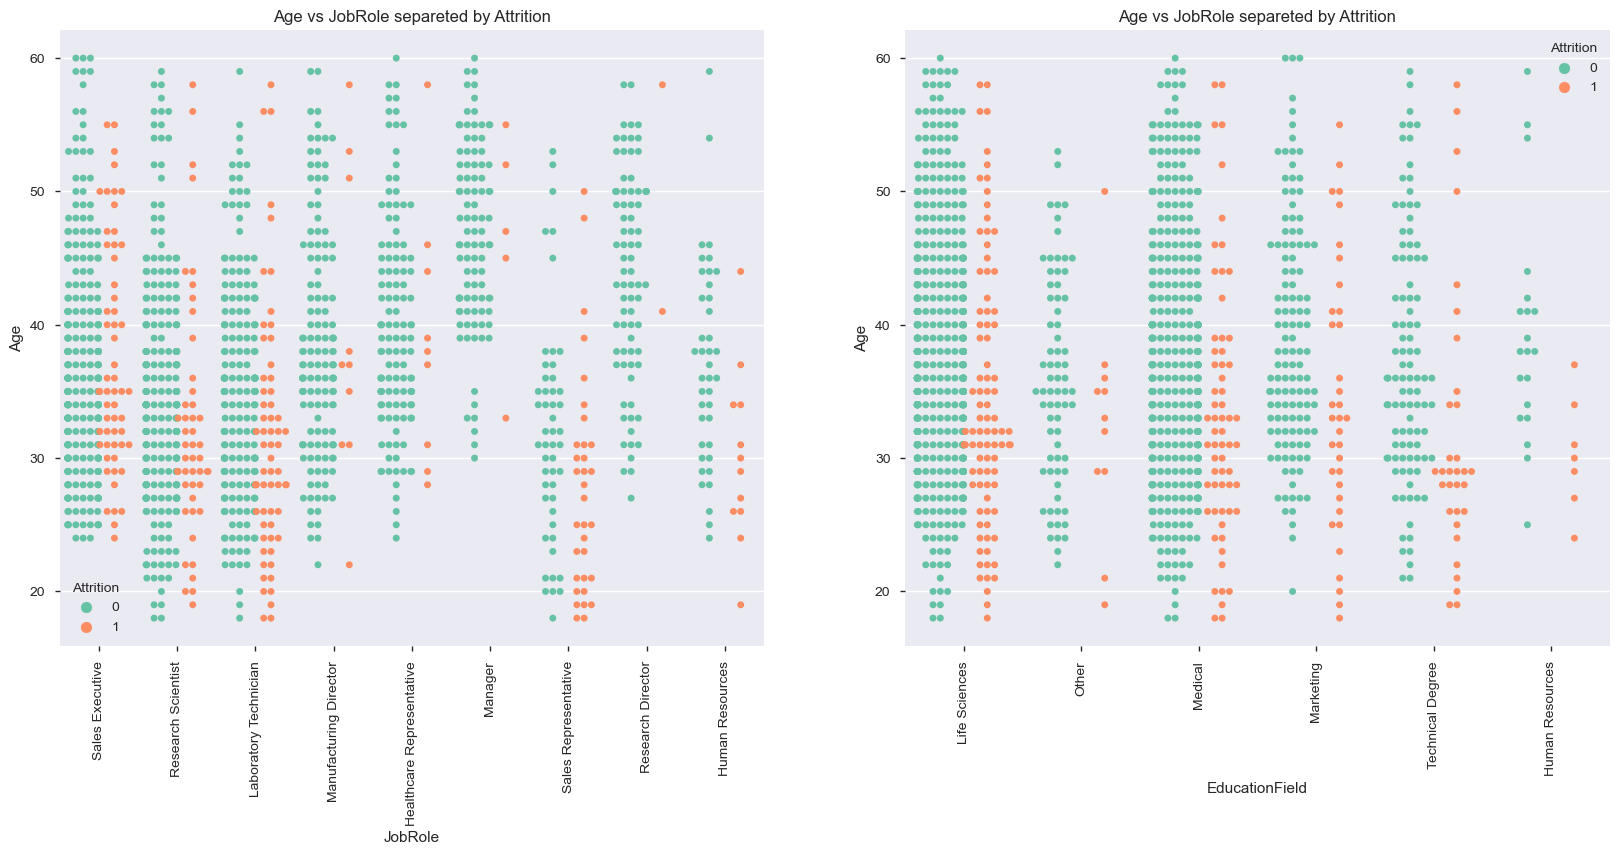

In [ ]:
categorical_numerical('Age','JobRole','EducationField')

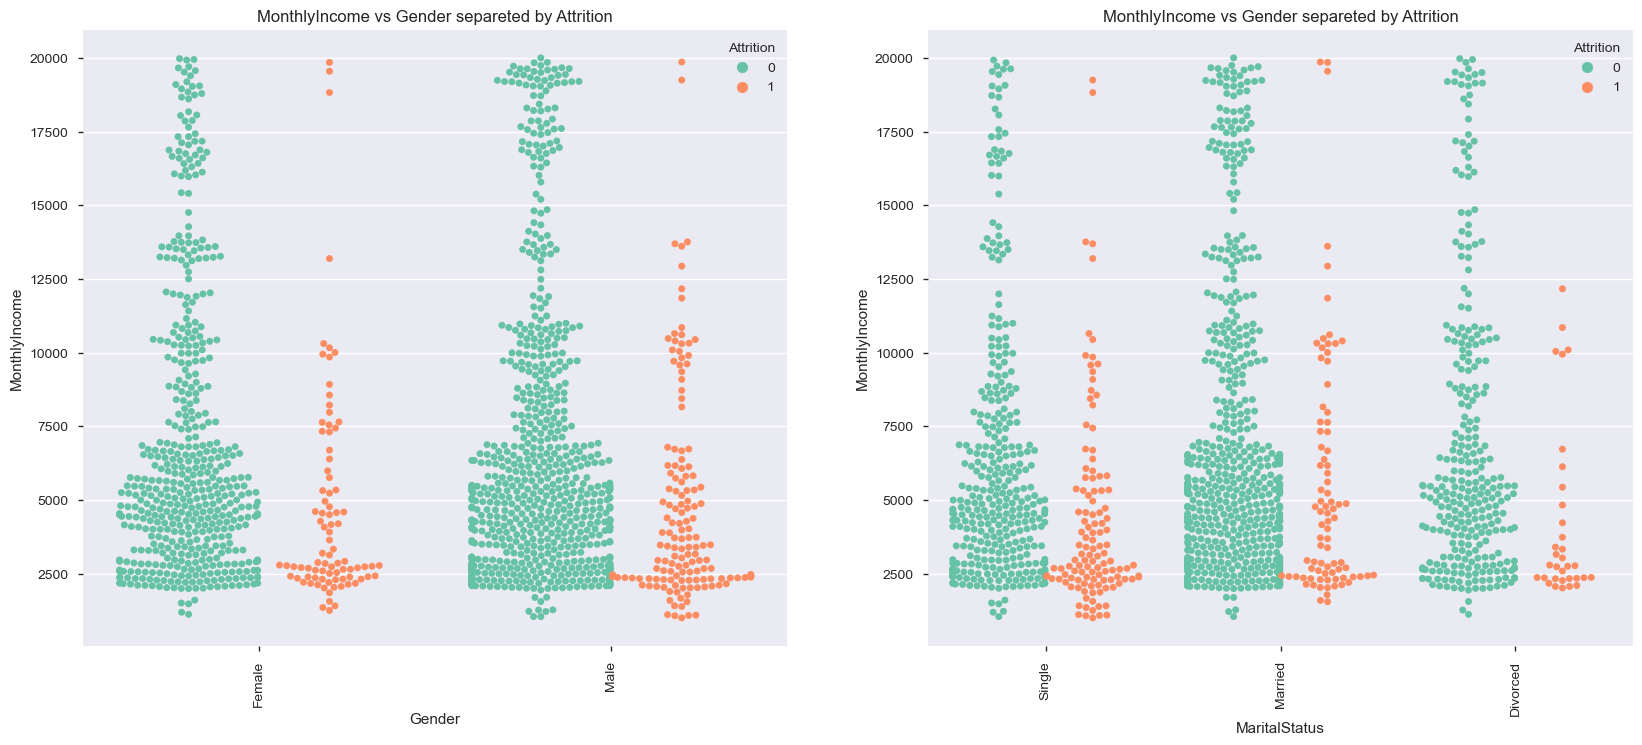

In [ ]:
categorical_numerical('MonthlyIncome','Gender','MaritalStatus')

## Feature Engineering

In [ ]:
# 'EnviornmentSatisfaction', 'JobInvolvement', 'JobSatisfacction', 'RelationshipSatisfaction', 'WorklifeBalance' can be clubbed into a single feature 'TotalSatisfaction'

df['Total_Satisfaction'] = (df['EnvironmentSatisfaction'] + 
                            df['JobInvolvement'] + 
                            df['JobSatisfaction'] + 
                            df['RelationshipSatisfaction'] +
                            df['WorkLifeBalance']) /5 

# Drop Columns
df.drop(['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance'], axis=1, inplace=True)

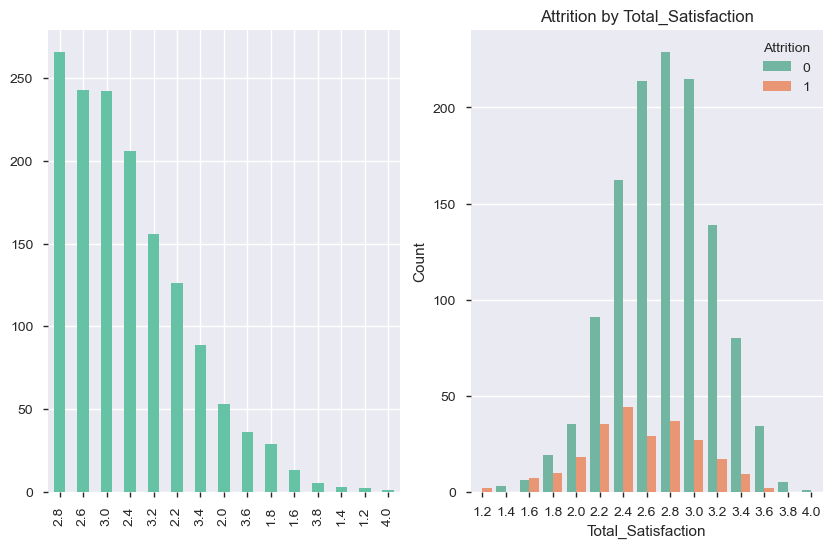

In [ ]:
categorical_column_viz('Total_Satisfaction')

In [ ]:
df.Total_Satisfaction.describe()

count    1470.000000
mean        2.730748
std         0.428551
min         1.200000
25%         2.400000
50%         2.800000
75%         3.000000
max         4.000000
Name: Total_Satisfaction, dtype: float64

In [ ]:
# Convert Total satisfaction into boolean
# median = 2.8
# x = 1 if x >= 2.8

df['Total_Satisfaction_bool'] = df['Total_Satisfaction'].apply(lambda x:1 if x>=2.8 else 0 ) 
df.drop('Total_Satisfaction', axis=1, inplace=True)

In [ ]:
# It can be observed that the rate of attrition of employees below age of 35 is high

df['Age_bool'] = df['Age'].apply(lambda x:1 if x<35 else 0)
df.drop('Age', axis=1, inplace=True)

In [ ]:
# It can be observed that the employees are more likey the drop the job if dailtRate less than 800

df['DailyRate_bool'] = df['DailyRate'].apply(lambda x:1 if x<800 else 0)
df.drop('DailyRate', axis=1, inplace=True)

In [ ]:
# Employees working at R&D Department have higher attrition rate

df['Department_bool'] = df['Department'].apply(lambda x:1 if x=='Research & Development' else 0)
df.drop('Department', axis=1, inplace=True)

In [ ]:
# Rate of attrition of employees is high if DistanceFromHome > 10

df['DistanceFromHome_bool'] = df['DistanceFromHome'].apply(lambda x:1 if x>10 else 0)
df.drop('DistanceFromHome', axis=1, inplace=True)

In [ ]:
# Employees are more likey to drop the job if the employee is working as Laboratory Technician

df['JobRole_bool'] = df['JobRole'].apply(lambda x:1 if x=='Laboratory Technician' else 0)
df.drop('JobRole', axis=1, inplace=True)

In [ ]:
# Employees are more likey to the drop the job if the employee's hourly rate < 65

df['HourlyRate_bool'] = df['HourlyRate'].apply(lambda x:1 if x<65 else 0)
df.drop('HourlyRate', axis=1, inplace=True)

In [ ]:
# Employees are more likey to the drop the job if the employee's MonthlyIncome < 4000

df['MonthlyIncome_bool'] = df['MonthlyIncome'].apply(lambda x:1 if x<4000 else 0)
df.drop('MonthlyIncome', axis=1, inplace=True)

In [ ]:
# Rate of attrition of employees is high if NumCompaniesWorked < 3

df['NumCompaniesWorked_bool'] = df['NumCompaniesWorked'].apply(lambda x:1 if x>3 else 0)
df.drop('NumCompaniesWorked', axis=1, inplace=True)

In [ ]:
# Employees are more likey to the drop the job if the employee's TotalWorkingYears < 8

df['TotalWorkingYears_bool'] = df['TotalWorkingYears'].apply(lambda x:1 if x<8 else 0)
df.drop('TotalWorkingYears', axis=1, inplace=True)

In [ ]:
# Employees are more likey to the drop the job if the employee's YearsAtCompany < 3

df['YearsAtCompany_bool'] = df['YearsAtCompany'].apply(lambda x:1 if x<3 else 0)
df.drop('YearsAtCompany', axis=1, inplace=True)

In [ ]:
# Employees are more likey to the drop the job if the employee's YearsInCurrentRole < 3

df['YearsInCurrentRole_bool'] = df['YearsInCurrentRole'].apply(lambda x:1 if x<3 else 0)
df.drop('YearsInCurrentRole', axis=1, inplace=True)

In [ ]:
# Employees are more likey to the drop the job if the employee's YearsSinceLastPromotion < 1

df['YearsSinceLastPromotion_bool'] = df['YearsSinceLastPromotion'].apply(lambda x:1 if x<1 else 0)
df.drop('YearsSinceLastPromotion', axis=1, inplace=True)

In [ ]:
# Employees are more likey to the drop the job if the employee's YearsWithCurrManager < 1

df['YearsWithCurrManager_bool'] = df['YearsWithCurrManager'].apply(lambda x:1 if x<1 else 0)
df.drop('YearsWithCurrManager', axis=1, inplace=True)

In [ ]:
df['Gender'] = df['Gender'].apply(lambda x:1 if x=='Female' else 0)

In [ ]:
df.drop('MonthlyRate', axis=1, inplace=True)
df.drop('PercentSalaryHike', axis=1, inplace=True)

In [ ]:
convert_category = ['BusinessTravel','Education','EducationField','MaritalStatus','StockOptionLevel','OverTime','Gender','TrainingTimesLastYear']
for col in convert_category:
        df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
Attrition                       1470 non-null int64
BusinessTravel                  1470 non-null category
Education                       1470 non-null category
EducationField                  1470 non-null category
Gender                          1470 non-null category
JobLevel                        1470 non-null int64
MaritalStatus                   1470 non-null category
OverTime                        1470 non-null category
PerformanceRating               1470 non-null int64
StockOptionLevel                1470 non-null category
TrainingTimesLastYear           1470 non-null category
Total_Satisfaction_bool         1470 non-null int64
Age_bool                        1470 non-null int64
DailyRate_bool                  1470 non-null int64
Department_bool                 1470 non-null int64
DistanceFromHome_bool           1470 non-null int64
JobRole_bool                    1470 

In [ ]:
#separate the categorical and numerical data
X_categorical = df.select_dtypes(include=['category'])
X_numerical = df.select_dtypes(include=['int64'])
X_numerical.drop('Attrition', axis=1, inplace=True)

In [ ]:
y = df['Attrition']

In [ ]:
# One HOt Encoding Categorical Features

onehotencoder = OneHotEncoder()

X_categorical = onehotencoder.fit_transform(X_categorical).toarray()
X_categorical = pd.DataFrame(X_categorical)
X_categorical

0    1    2    3    4    5    6    7    8    9   ...   22   23   24  \
0     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
1     0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0   
2     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3     0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
4     0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1465  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
1466  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
1467  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0   
1468  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1469  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       25   26   27   28   29   30   31  
0     1.0  0.0  0.0  0.0  0.0  0.0  0.0  
1     0.0  0.0  0.0  1.0  0.0  0.0  0.0  
2     0.0  0.0  0.0  1.0  0.0  0.0  0.0  
3     0.0  0.0  0.0  1.0  0.0  0.0  0.0  
4     0.0  0.0  0.0  1.0  0.0  0.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  
1465  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
1466  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1467  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
1468  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
1469  0.0  0.0  0.0  1.0  0.0  0.0  0.0  

[1470 rows x 32 columns]

In [ ]:
#concat the categorical and numerical values

X_all = pd.concat([X_categorical, X_numerical], axis=1)
X_all.head()

0    1    2    3    4    5    6    7    8    9  ...  \
0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
1  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...   
2  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...   
3  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  ...   
4  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

   DistanceFromHome_bool  JobRole_bool  HourlyRate_bool  MonthlyIncome_bool  \
0                      0             0                0                   0   
1                      0             0                1                   0   
2                      0             1                0                   1   
3                      0             0                1                   1   
4                      0             1                1                   1   

   NumCompaniesWorked_bool  TotalWorkingYears_bool  YearsAtCompany_bool  \
0                        1                       0                    0   
1                        0                       0                    0   
2                        1                       1                    1   
3                        0                       0                    0   
4                        1                       1                    1   

   YearsInCurrentRole_bool  YearsSinceLastPromotion_bool  \
0                        0                             1   
1                        0                             0   
2                        1                             1   
3                        0                             0   
4                        1                             0   

   YearsWithCurrManager_bool  
0                          0  
1                          0  
2                          1  
3                          1  
4                          0  

[5 rows x 48 columns]

In [ ]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
0                               1470 non-null float64
1                               1470 non-null float64
2                               1470 non-null float64
3                               1470 non-null float64
4                               1470 non-null float64
5                               1470 non-null float64
6                               1470 non-null float64
7                               1470 non-null float64
8                               1470 non-null float64
9                               1470 non-null float64
10                              1470 non-null float64
11                              1470 non-null float64
12                              1470 non-null float64
13                              1470 non-null float64
14                              1470 non-null float64
15                              1470 non-null float64
16                           

### Split Data

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X_all,y, test_size=0.30)

In [ ]:
print(f"Train data shape: {X_train.shape}, Test Data Shape {X_test.shape}")

Train data shape: (1029, 48), Test Data Shape (441, 48)


In [ ]:
X_train.head()

0    1    2    3    4    5    6    7    8    9  ...  \
772   0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   
1403  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   
9     0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   
662   0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   
1387  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...   

      DistanceFromHome_bool  JobRole_bool  HourlyRate_bool  \
772                       0             0                1   
1403                      1             0                0   
9                         1             0                0   
662                       0             0                1   
1387                      0             0                0   

      MonthlyIncome_bool  NumCompaniesWorked_bool  TotalWorkingYears_bool  \
772                    1                        0                       0   
1403                   0                        0                       0   
9                      0                        1                       0   
662                    1                        0                       1   
1387                   0                        0                       1   

      YearsAtCompany_bool  YearsInCurrentRole_bool  \
772                     0                        0   
1403                    0                        0   
9                       0                        0   
662                     1                        1   
1387                    0                        0   

      YearsSinceLastPromotion_bool  YearsWithCurrManager_bool  
772                              1                          0  
1403                             0                          0  
9                                0                          0  
662                              1                          0  
1387                             1                          0  

[5 rows x 48 columns]

## Train Data

In [ ]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train,y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo,X_train,y_train,cv=cv,n_jobs = -1)
    
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

### Logistic Regression

In [ ]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), X_train,y_train, 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 89.89
Accuracy CV 10-Fold: 87.66
Running Time: 0:00:02.534987


### Support Vector Machine

In [ ]:
# SVC
start_time = time.time()
train_pred_svc, acc_svc, acc_cv_svc = fit_ml_algo(SVC(),X_train,y_train,10)
svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_svc)
print("Running Time: %s" % datetime.timedelta(seconds=svc_time))

Accuracy: 87.76
Accuracy CV 10-Fold: 86.1
Running Time: 0:00:00.207994


### Linear Support Vector Machines 

In [ ]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),X_train, y_train,10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 89.5
Accuracy CV 10-Fold: 87.27
Running Time: 0:00:00.269995


### K Nearest Neighbour

In [ ]:
# K Nearest Neighbour
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3),X_train,y_train,10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 89.21
Accuracy CV 10-Fold: 83.28
Running Time: 0:00:00.239998


### Gaussian Naive Bayes

In [ ]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(),X_train,y_train,10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 80.17
Accuracy CV 10-Fold: 77.45
Running Time: 0:00:00.064000


### Perceptron

In [ ]:
# Perceptron
start_time = time.time()
train_pred_gaussian, acc_perceptron, acc_cv_perceptron = fit_ml_algo(Perceptron(),X_train,y_train,10)
perceptron_time = (time.time() - start_time)
print("Accuracy: %s" % acc_perceptron)
print("Accuracy CV 10-Fold: %s" % acc_cv_perceptron)
print("Running Time: %s" % datetime.timedelta(seconds=perceptron_time))

Accuracy: 87.27
Accuracy CV 10-Fold: 82.12
Running Time: 0:00:00.073985


### Stochastic Gradient Descent

In [ ]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(),X_train, y_train,10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 86.78
Accuracy CV 10-Fold: 83.97
Running Time: 0:00:00.096004


### Decision Tree

In [ ]:
# Decision Tree
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(),X_train, y_train,10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 78.62
Running Time: 0:00:00.098000


### Gradient Boosting Trees

In [ ]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(),X_train, y_train,10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 93.0
Accuracy CV 10-Fold: 87.17
Running Time: 0:00:00.702999


### Random Forest

In [ ]:
# Random Forest
start_time = time.time()
train_pred_dt, acc_rf, acc_cv_rf = fit_ml_algo(RandomForestClassifier(n_estimators=100),X_train, y_train,10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 85.33
Running Time: 0:00:00.789033


### CatBoost Classifier

In [ ]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
      dtype=int64)

In [ ]:
# pool training data and categorical feature labels together
train_pool = Pool(X_train, y_train,cat_features)  

In [ ]:
# CatBoost
catboost_model = CatBoostClassifier(iterations=1000,custom_loss=['Accuracy'],loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.010429
0:	learn: 0.6840844	total: 194ms	remaining: 3m 13s
1:	learn: 0.6751003	total: 224ms	remaining: 1m 51s
2:	learn: 0.6667403	total: 242ms	remaining: 1m 20s
3:	learn: 0.6591424	total: 260ms	remaining: 1m 4s
4:	learn: 0.6512910	total: 282ms	remaining: 56.1s
5:	learn: 0.6443287	total: 304ms	remaining: 50.3s
6:	learn: 0.6389286	total: 330ms	remaining: 46.8s
7:	learn: 0.6318779	total: 348ms	remaining: 43.2s
8:	learn: 0.6244658	total: 370ms	remaining: 40.8s
9:	learn: 0.6187083	total: 383ms	remaining: 37.9s
10:	learn: 0.6125992	total: 404ms	remaining: 36.3s
11:	learn: 0.6065297	total: 425ms	remaining: 35s
12:	learn: 0.6008210	total: 435ms	remaining: 33s
13:	learn: 0.5951041	total: 460ms	remaining: 32.4s
14:	learn: 0.5898887	total: 478ms	remaining: 31.4s
15:	learn: 0.5856523	total: 501ms	remaining: 30.8s
16:	learn: 0.5809214	total: 528ms	remaining: 30.5s
17:	learn: 0.5758351	total: 554ms	remaining: 30.2s
18:	learn: 0.5710821	total: 586ms	remaining: 30.2s
19:	learn: 0

169:	learn: 0.3180725	total: 3.88s	remaining: 18.9s
170:	learn: 0.3177966	total: 3.89s	remaining: 18.9s
171:	learn: 0.3174566	total: 3.91s	remaining: 18.8s
172:	learn: 0.3164693	total: 3.93s	remaining: 18.8s
173:	learn: 0.3158136	total: 3.95s	remaining: 18.7s
174:	learn: 0.3150702	total: 3.98s	remaining: 18.8s
175:	learn: 0.3145904	total: 4s	remaining: 18.7s
176:	learn: 0.3140729	total: 4.04s	remaining: 18.8s
177:	learn: 0.3135585	total: 4.07s	remaining: 18.8s
178:	learn: 0.3132967	total: 4.08s	remaining: 18.7s
179:	learn: 0.3127600	total: 4.12s	remaining: 18.8s
180:	learn: 0.3126557	total: 4.13s	remaining: 18.7s
181:	learn: 0.3120733	total: 4.15s	remaining: 18.7s
182:	learn: 0.3113617	total: 4.17s	remaining: 18.6s
183:	learn: 0.3104375	total: 4.19s	remaining: 18.6s
184:	learn: 0.3098817	total: 4.21s	remaining: 18.6s
185:	learn: 0.3092089	total: 4.24s	remaining: 18.5s
186:	learn: 0.3085546	total: 4.26s	remaining: 18.5s
187:	learn: 0.3076987	total: 4.28s	remaining: 18.5s
188:	learn: 0.3

330:	learn: 0.2530594	total: 7.51s	remaining: 15.2s
331:	learn: 0.2527164	total: 7.54s	remaining: 15.2s
332:	learn: 0.2525244	total: 7.58s	remaining: 15.2s
333:	learn: 0.2522175	total: 7.6s	remaining: 15.2s
334:	learn: 0.2519898	total: 7.63s	remaining: 15.2s
335:	learn: 0.2516307	total: 7.66s	remaining: 15.1s
336:	learn: 0.2513790	total: 7.7s	remaining: 15.1s
337:	learn: 0.2512162	total: 7.72s	remaining: 15.1s
338:	learn: 0.2507776	total: 7.75s	remaining: 15.1s
339:	learn: 0.2503914	total: 7.78s	remaining: 15.1s
340:	learn: 0.2500873	total: 7.8s	remaining: 15.1s
341:	learn: 0.2498485	total: 7.83s	remaining: 15.1s
342:	learn: 0.2495397	total: 7.85s	remaining: 15s
343:	learn: 0.2492038	total: 7.88s	remaining: 15s
344:	learn: 0.2487913	total: 7.9s	remaining: 15s
345:	learn: 0.2486025	total: 7.93s	remaining: 15s
346:	learn: 0.2483937	total: 7.96s	remaining: 15s
347:	learn: 0.2480680	total: 7.99s	remaining: 15s
348:	learn: 0.2478302	total: 8.02s	remaining: 15s
349:	learn: 0.2476887	total: 8

492:	learn: 0.2144086	total: 11.2s	remaining: 11.5s
493:	learn: 0.2139709	total: 11.3s	remaining: 11.5s
494:	learn: 0.2135218	total: 11.3s	remaining: 11.5s
495:	learn: 0.2133779	total: 11.3s	remaining: 11.5s
496:	learn: 0.2130072	total: 11.3s	remaining: 11.5s
497:	learn: 0.2128052	total: 11.3s	remaining: 11.4s
498:	learn: 0.2126653	total: 11.4s	remaining: 11.4s
499:	learn: 0.2125428	total: 11.4s	remaining: 11.4s
500:	learn: 0.2124048	total: 11.4s	remaining: 11.4s
501:	learn: 0.2122746	total: 11.4s	remaining: 11.3s
502:	learn: 0.2121134	total: 11.5s	remaining: 11.3s
503:	learn: 0.2119405	total: 11.5s	remaining: 11.3s
504:	learn: 0.2117748	total: 11.5s	remaining: 11.3s
505:	learn: 0.2116352	total: 11.5s	remaining: 11.2s
506:	learn: 0.2114907	total: 11.5s	remaining: 11.2s
507:	learn: 0.2113750	total: 11.5s	remaining: 11.2s
508:	learn: 0.2111716	total: 11.6s	remaining: 11.2s
509:	learn: 0.2109873	total: 11.6s	remaining: 11.1s
510:	learn: 0.2106202	total: 11.6s	remaining: 11.1s
511:	learn: 

656:	learn: 0.1820075	total: 14.9s	remaining: 7.79s
657:	learn: 0.1816775	total: 14.9s	remaining: 7.76s
658:	learn: 0.1816313	total: 14.9s	remaining: 7.74s
659:	learn: 0.1815545	total: 15s	remaining: 7.71s
660:	learn: 0.1813495	total: 15s	remaining: 7.68s
661:	learn: 0.1813125	total: 15s	remaining: 7.66s
662:	learn: 0.1811312	total: 15s	remaining: 7.64s
663:	learn: 0.1809780	total: 15.1s	remaining: 7.62s
664:	learn: 0.1808430	total: 15.1s	remaining: 7.59s
665:	learn: 0.1807351	total: 15.1s	remaining: 7.56s
666:	learn: 0.1804734	total: 15.1s	remaining: 7.54s
667:	learn: 0.1802957	total: 15.1s	remaining: 7.52s
668:	learn: 0.1801704	total: 15.2s	remaining: 7.5s
669:	learn: 0.1800690	total: 15.2s	remaining: 7.48s
670:	learn: 0.1799121	total: 15.2s	remaining: 7.45s
671:	learn: 0.1798635	total: 15.2s	remaining: 7.42s
672:	learn: 0.1796852	total: 15.2s	remaining: 7.4s
673:	learn: 0.1795222	total: 15.2s	remaining: 7.38s
674:	learn: 0.1791986	total: 15.3s	remaining: 7.35s
675:	learn: 0.1791159	

820:	learn: 0.1533835	total: 18.3s	remaining: 3.99s
821:	learn: 0.1532758	total: 18.3s	remaining: 3.97s
822:	learn: 0.1531220	total: 18.3s	remaining: 3.94s
823:	learn: 0.1530054	total: 18.4s	remaining: 3.92s
824:	learn: 0.1528698	total: 18.4s	remaining: 3.9s
825:	learn: 0.1525198	total: 18.4s	remaining: 3.88s
826:	learn: 0.1523445	total: 18.4s	remaining: 3.85s
827:	learn: 0.1520242	total: 18.4s	remaining: 3.83s
828:	learn: 0.1518589	total: 18.5s	remaining: 3.81s
829:	learn: 0.1516278	total: 18.5s	remaining: 3.78s
830:	learn: 0.1513539	total: 18.5s	remaining: 3.76s
831:	learn: 0.1510021	total: 18.5s	remaining: 3.74s
832:	learn: 0.1508325	total: 18.5s	remaining: 3.72s
833:	learn: 0.1505820	total: 18.6s	remaining: 3.69s
834:	learn: 0.1505094	total: 18.6s	remaining: 3.67s
835:	learn: 0.1503849	total: 18.6s	remaining: 3.65s
836:	learn: 0.1501598	total: 18.6s	remaining: 3.62s
837:	learn: 0.1500419	total: 18.6s	remaining: 3.6s
838:	learn: 0.1499503	total: 18.7s	remaining: 3.58s
839:	learn: 0.

983:	learn: 0.1295425	total: 21.4s	remaining: 347ms
984:	learn: 0.1294663	total: 21.4s	remaining: 325ms
985:	learn: 0.1292356	total: 21.4s	remaining: 304ms
986:	learn: 0.1291563	total: 21.4s	remaining: 282ms
987:	learn: 0.1290762	total: 21.4s	remaining: 260ms
988:	learn: 0.1290078	total: 21.4s	remaining: 238ms
989:	learn: 0.1289771	total: 21.5s	remaining: 217ms
990:	learn: 0.1287572	total: 21.5s	remaining: 195ms
991:	learn: 0.1286737	total: 21.5s	remaining: 173ms
992:	learn: 0.1286221	total: 21.5s	remaining: 152ms
993:	learn: 0.1284892	total: 21.5s	remaining: 130ms
994:	learn: 0.1284003	total: 21.5s	remaining: 108ms
995:	learn: 0.1283317	total: 21.5s	remaining: 86.5ms
996:	learn: 0.1282570	total: 21.6s	remaining: 64.9ms
997:	learn: 0.1281082	total: 21.6s	remaining: 43.3ms
998:	learn: 0.1280582	total: 21.6s	remaining: 21.6ms
999:	learn: 0.1279371	total: 21.6s	remaining: 0us


In [ ]:
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# cross-validation
cv_data = cv(train_pool,cv_params,fold_count=10,plot=True)
catboost_time = (time.time() - start_time)

# Cross-validation accuracy metric
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6737115	test: 0.6745023	best: 0.6745023 (0)	total: 484ms	remaining: 8m 3s
1:	learn: 0.6520071	test: 0.6541913	best: 0.6541913 (1)	total: 1.1s	remaining: 9m 10s
2:	learn: 0.6322050	test: 0.6358143	best: 0.6358143 (2)	total: 1.66s	remaining: 9m 10s
3:	learn: 0.6132054	test: 0.6176364	best: 0.6176364 (3)	total: 2.16s	remaining: 8m 59s
4:	learn: 0.5960814	test: 0.6017297	best: 0.6017297 (4)	total: 2.61s	remaining: 8m 39s
5:	learn: 0.5790739	test: 0.5854931	best: 0.5854931 (5)	total: 3.14s	remaining: 8m 39s
6:	learn: 0.5634889	test: 0.5710245	best: 0.5710245 (6)	total: 3.67s	remaining: 8m 41s
7:	learn: 0.5492512	test: 0.5576805	best: 0.5576805 (7)	total: 4.13s	remaining: 8m 31s
8:	learn: 0.5361871	test: 0.5454584	best: 0.5454584 (8)	total: 4.59s	remaining: 8m 25s
9:	learn: 0.5251836	test: 0.5349541	best: 0.5349541 (9)	total: 5.02s	remaining: 8m 17s
10:	learn: 0.5121243	test: 0.5227255	best: 0.5227255 (10)	total: 5.56s	remaining: 8m 19s
11:	learn: 0.5030016	test: 0.5140236	best: 

93:	learn: 0.2624115	test: 0.3532844	best: 0.3532844 (93)	total: 44.5s	remaining: 7m 9s
94:	learn: 0.2612449	test: 0.3531698	best: 0.3531698 (94)	total: 45s	remaining: 7m 8s
95:	learn: 0.2602886	test: 0.3530168	best: 0.3530168 (95)	total: 45.5s	remaining: 7m 8s
96:	learn: 0.2592732	test: 0.3527620	best: 0.3527620 (96)	total: 46s	remaining: 7m 8s
97:	learn: 0.2583203	test: 0.3530239	best: 0.3527620 (96)	total: 46.4s	remaining: 7m 7s
98:	learn: 0.2571382	test: 0.3529176	best: 0.3527620 (96)	total: 46.9s	remaining: 7m 7s
99:	learn: 0.2559648	test: 0.3526922	best: 0.3526922 (99)	total: 47.4s	remaining: 7m 6s
100:	learn: 0.2552561	test: 0.3526822	best: 0.3526822 (100)	total: 47.9s	remaining: 7m 6s
101:	learn: 0.2543334	test: 0.3524172	best: 0.3524172 (101)	total: 48.3s	remaining: 7m 5s
102:	learn: 0.2531692	test: 0.3520248	best: 0.3520248 (102)	total: 48.8s	remaining: 7m 4s
103:	learn: 0.2521897	test: 0.3518161	best: 0.3518161 (103)	total: 49.3s	remaining: 7m 4s
104:	learn: 0.2513354	test: 

184:	learn: 0.1928113	test: 0.3455715	best: 0.3453529 (182)	total: 1m 28s	remaining: 6m 31s
185:	learn: 0.1921783	test: 0.3456022	best: 0.3453529 (182)	total: 1m 29s	remaining: 6m 30s
186:	learn: 0.1914468	test: 0.3453123	best: 0.3453123 (186)	total: 1m 29s	remaining: 6m 30s
187:	learn: 0.1909692	test: 0.3452221	best: 0.3452221 (187)	total: 1m 30s	remaining: 6m 29s
188:	learn: 0.1905059	test: 0.3452133	best: 0.3452133 (188)	total: 1m 30s	remaining: 6m 29s
189:	learn: 0.1899009	test: 0.3451640	best: 0.3451640 (189)	total: 1m 31s	remaining: 6m 28s
190:	learn: 0.1893090	test: 0.3452676	best: 0.3451640 (189)	total: 1m 31s	remaining: 6m 28s
191:	learn: 0.1886989	test: 0.3453888	best: 0.3451640 (189)	total: 1m 32s	remaining: 6m 27s
192:	learn: 0.1880341	test: 0.3454039	best: 0.3451640 (189)	total: 1m 32s	remaining: 6m 27s
193:	learn: 0.1874280	test: 0.3455843	best: 0.3451640 (189)	total: 1m 33s	remaining: 6m 26s
194:	learn: 0.1869715	test: 0.3455108	best: 0.3451640 (189)	total: 1m 33s	remain

274:	learn: 0.1434089	test: 0.3483819	best: 0.3451640 (189)	total: 2m 13s	remaining: 5m 51s
275:	learn: 0.1429148	test: 0.3484019	best: 0.3451640 (189)	total: 2m 13s	remaining: 5m 51s
276:	learn: 0.1424600	test: 0.3483841	best: 0.3451640 (189)	total: 2m 14s	remaining: 5m 50s
277:	learn: 0.1419785	test: 0.3485206	best: 0.3451640 (189)	total: 2m 14s	remaining: 5m 50s
278:	learn: 0.1414825	test: 0.3489339	best: 0.3451640 (189)	total: 2m 15s	remaining: 5m 49s
279:	learn: 0.1409897	test: 0.3491306	best: 0.3451640 (189)	total: 2m 15s	remaining: 5m 49s
280:	learn: 0.1403804	test: 0.3491310	best: 0.3451640 (189)	total: 2m 16s	remaining: 5m 48s
281:	learn: 0.1399421	test: 0.3489349	best: 0.3451640 (189)	total: 2m 16s	remaining: 5m 48s
282:	learn: 0.1394200	test: 0.3489670	best: 0.3451640 (189)	total: 2m 17s	remaining: 5m 47s
283:	learn: 0.1389698	test: 0.3490055	best: 0.3451640 (189)	total: 2m 17s	remaining: 5m 47s
284:	learn: 0.1385053	test: 0.3490319	best: 0.3451640 (189)	total: 2m 18s	remain

364:	learn: 0.1062454	test: 0.3554087	best: 0.3451640 (189)	total: 2m 56s	remaining: 5m 7s
365:	learn: 0.1059918	test: 0.3555634	best: 0.3451640 (189)	total: 2m 57s	remaining: 5m 7s
366:	learn: 0.1055990	test: 0.3555485	best: 0.3451640 (189)	total: 2m 57s	remaining: 5m 6s
367:	learn: 0.1053700	test: 0.3555417	best: 0.3451640 (189)	total: 2m 58s	remaining: 5m 6s
368:	learn: 0.1050710	test: 0.3555134	best: 0.3451640 (189)	total: 2m 58s	remaining: 5m 5s
369:	learn: 0.1047146	test: 0.3556913	best: 0.3451640 (189)	total: 2m 59s	remaining: 5m 5s
370:	learn: 0.1043518	test: 0.3556794	best: 0.3451640 (189)	total: 2m 59s	remaining: 5m 4s
371:	learn: 0.1040840	test: 0.3555437	best: 0.3451640 (189)	total: 3m	remaining: 5m 4s
372:	learn: 0.1037075	test: 0.3559015	best: 0.3451640 (189)	total: 3m	remaining: 5m 3s
373:	learn: 0.1033465	test: 0.3559672	best: 0.3451640 (189)	total: 3m 1s	remaining: 5m 3s
374:	learn: 0.1030435	test: 0.3560910	best: 0.3451640 (189)	total: 3m 1s	remaining: 5m 2s
375:	lear

454:	learn: 0.0813556	test: 0.3627998	best: 0.3451640 (189)	total: 3m 40s	remaining: 4m 24s
455:	learn: 0.0811272	test: 0.3626302	best: 0.3451640 (189)	total: 3m 41s	remaining: 4m 23s
456:	learn: 0.0808820	test: 0.3628026	best: 0.3451640 (189)	total: 3m 41s	remaining: 4m 23s
457:	learn: 0.0806656	test: 0.3630158	best: 0.3451640 (189)	total: 3m 42s	remaining: 4m 23s
458:	learn: 0.0804522	test: 0.3631364	best: 0.3451640 (189)	total: 3m 42s	remaining: 4m 22s
459:	learn: 0.0802366	test: 0.3631828	best: 0.3451640 (189)	total: 3m 43s	remaining: 4m 22s
460:	learn: 0.0800271	test: 0.3632683	best: 0.3451640 (189)	total: 3m 43s	remaining: 4m 21s
461:	learn: 0.0798261	test: 0.3633911	best: 0.3451640 (189)	total: 3m 44s	remaining: 4m 21s
462:	learn: 0.0795623	test: 0.3636364	best: 0.3451640 (189)	total: 3m 44s	remaining: 4m 20s
463:	learn: 0.0793657	test: 0.3637555	best: 0.3451640 (189)	total: 3m 45s	remaining: 4m 20s
464:	learn: 0.0791639	test: 0.3640606	best: 0.3451640 (189)	total: 3m 45s	remain

544:	learn: 0.0645253	test: 0.3732286	best: 0.3451640 (189)	total: 4m 26s	remaining: 3m 42s
545:	learn: 0.0643441	test: 0.3733400	best: 0.3451640 (189)	total: 4m 26s	remaining: 3m 41s
546:	learn: 0.0641785	test: 0.3736658	best: 0.3451640 (189)	total: 4m 27s	remaining: 3m 41s
547:	learn: 0.0640429	test: 0.3737704	best: 0.3451640 (189)	total: 4m 27s	remaining: 3m 40s
548:	learn: 0.0638718	test: 0.3739022	best: 0.3451640 (189)	total: 4m 28s	remaining: 3m 40s
549:	learn: 0.0637186	test: 0.3740369	best: 0.3451640 (189)	total: 4m 28s	remaining: 3m 39s
550:	learn: 0.0635535	test: 0.3741751	best: 0.3451640 (189)	total: 4m 28s	remaining: 3m 39s
551:	learn: 0.0634114	test: 0.3742901	best: 0.3451640 (189)	total: 4m 29s	remaining: 3m 38s
552:	learn: 0.0632692	test: 0.3743241	best: 0.3451640 (189)	total: 4m 29s	remaining: 3m 38s
553:	learn: 0.0630836	test: 0.3746000	best: 0.3451640 (189)	total: 4m 30s	remaining: 3m 37s
554:	learn: 0.0629363	test: 0.3747264	best: 0.3451640 (189)	total: 4m 30s	remain

634:	learn: 0.0520987	test: 0.3848768	best: 0.3451640 (189)	total: 5m 11s	remaining: 2m 59s
635:	learn: 0.0519800	test: 0.3850596	best: 0.3451640 (189)	total: 5m 12s	remaining: 2m 58s
636:	learn: 0.0518719	test: 0.3852694	best: 0.3451640 (189)	total: 5m 12s	remaining: 2m 58s
637:	learn: 0.0517747	test: 0.3854211	best: 0.3451640 (189)	total: 5m 13s	remaining: 2m 57s
638:	learn: 0.0516699	test: 0.3854606	best: 0.3451640 (189)	total: 5m 13s	remaining: 2m 57s
639:	learn: 0.0515691	test: 0.3853909	best: 0.3451640 (189)	total: 5m 14s	remaining: 2m 56s
640:	learn: 0.0514121	test: 0.3856974	best: 0.3451640 (189)	total: 5m 14s	remaining: 2m 56s
641:	learn: 0.0513080	test: 0.3857872	best: 0.3451640 (189)	total: 5m 15s	remaining: 2m 55s
642:	learn: 0.0511981	test: 0.3859390	best: 0.3451640 (189)	total: 5m 15s	remaining: 2m 55s
643:	learn: 0.0510921	test: 0.3860373	best: 0.3451640 (189)	total: 5m 16s	remaining: 2m 54s
644:	learn: 0.0509648	test: 0.3862056	best: 0.3451640 (189)	total: 5m 16s	remain

724:	learn: 0.0428945	test: 0.3941754	best: 0.3451640 (189)	total: 5m 57s	remaining: 2m 15s
725:	learn: 0.0428277	test: 0.3942051	best: 0.3451640 (189)	total: 5m 58s	remaining: 2m 15s
726:	learn: 0.0427308	test: 0.3944564	best: 0.3451640 (189)	total: 5m 58s	remaining: 2m 14s
727:	learn: 0.0426454	test: 0.3947379	best: 0.3451640 (189)	total: 5m 59s	remaining: 2m 14s
728:	learn: 0.0425664	test: 0.3949350	best: 0.3451640 (189)	total: 5m 59s	remaining: 2m 13s
729:	learn: 0.0424839	test: 0.3949333	best: 0.3451640 (189)	total: 6m	remaining: 2m 13s
730:	learn: 0.0424169	test: 0.3950219	best: 0.3451640 (189)	total: 6m	remaining: 2m 12s
731:	learn: 0.0423445	test: 0.3951779	best: 0.3451640 (189)	total: 6m	remaining: 2m 12s
732:	learn: 0.0422746	test: 0.3951970	best: 0.3451640 (189)	total: 6m 1s	remaining: 2m 11s
733:	learn: 0.0421552	test: 0.3953290	best: 0.3451640 (189)	total: 6m 2s	remaining: 2m 11s
734:	learn: 0.0420834	test: 0.3953688	best: 0.3451640 (189)	total: 6m 2s	remaining: 2m 10s
735

814:	learn: 0.0362578	test: 0.4038286	best: 0.3451640 (189)	total: 6m 43s	remaining: 1m 31s
815:	learn: 0.0361701	test: 0.4039506	best: 0.3451640 (189)	total: 6m 44s	remaining: 1m 31s
816:	learn: 0.0360976	test: 0.4040041	best: 0.3451640 (189)	total: 6m 44s	remaining: 1m 30s
817:	learn: 0.0360257	test: 0.4041532	best: 0.3451640 (189)	total: 6m 45s	remaining: 1m 30s
818:	learn: 0.0359653	test: 0.4043244	best: 0.3451640 (189)	total: 6m 45s	remaining: 1m 29s
819:	learn: 0.0359068	test: 0.4045924	best: 0.3451640 (189)	total: 6m 46s	remaining: 1m 29s
820:	learn: 0.0358390	test: 0.4047518	best: 0.3451640 (189)	total: 6m 46s	remaining: 1m 28s
821:	learn: 0.0357701	test: 0.4048067	best: 0.3451640 (189)	total: 6m 47s	remaining: 1m 28s
822:	learn: 0.0357133	test: 0.4049140	best: 0.3451640 (189)	total: 6m 47s	remaining: 1m 27s
823:	learn: 0.0356499	test: 0.4050668	best: 0.3451640 (189)	total: 6m 48s	remaining: 1m 27s
824:	learn: 0.0355909	test: 0.4051546	best: 0.3451640 (189)	total: 6m 48s	remain

904:	learn: 0.0310122	test: 0.4137684	best: 0.3451640 (189)	total: 7m 31s	remaining: 47.4s
905:	learn: 0.0309385	test: 0.4139746	best: 0.3451640 (189)	total: 7m 31s	remaining: 46.9s
906:	learn: 0.0308765	test: 0.4142275	best: 0.3451640 (189)	total: 7m 32s	remaining: 46.4s
907:	learn: 0.0308292	test: 0.4144511	best: 0.3451640 (189)	total: 7m 32s	remaining: 45.9s
908:	learn: 0.0307732	test: 0.4145059	best: 0.3451640 (189)	total: 7m 33s	remaining: 45.4s
909:	learn: 0.0307183	test: 0.4146972	best: 0.3451640 (189)	total: 7m 33s	remaining: 44.9s
910:	learn: 0.0306732	test: 0.4147515	best: 0.3451640 (189)	total: 7m 34s	remaining: 44.4s
911:	learn: 0.0306165	test: 0.4147904	best: 0.3451640 (189)	total: 7m 34s	remaining: 43.9s
912:	learn: 0.0305636	test: 0.4147931	best: 0.3451640 (189)	total: 7m 35s	remaining: 43.4s
913:	learn: 0.0305181	test: 0.4149961	best: 0.3451640 (189)	total: 7m 35s	remaining: 42.9s
914:	learn: 0.0304765	test: 0.4150248	best: 0.3451640 (189)	total: 7m 36s	remaining: 42.4s

995:	learn: 0.0267771	test: 0.4232267	best: 0.3451640 (189)	total: 8m 19s	remaining: 2s
996:	learn: 0.0267233	test: 0.4233080	best: 0.3451640 (189)	total: 8m 19s	remaining: 1.5s
997:	learn: 0.0266916	test: 0.4234219	best: 0.3451640 (189)	total: 8m 20s	remaining: 1s
998:	learn: 0.0266528	test: 0.4236120	best: 0.3451640 (189)	total: 8m 20s	remaining: 501ms
999:	learn: 0.0266080	test: 0.4235866	best: 0.3451640 (189)	total: 8m 21s	remaining: 0us


## Training Model Results

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','Linear SVC','KNN','Naive Bayes','Perceptron',
              'Stochastic Gradient Decent','Decision Tree', 'Gradient Boosting Trees','Random Forest',
              'CatBoost'],
    'Score': [
        acc_log,
        acc_svc,
        acc_linear_svc,
        acc_knn,
        acc_gaussian,
        acc_perceptron,
        acc_sgd,  
        acc_dt,
        acc_gbt,
        acc_rf,
        acc_catboost
    ]})
models.sort_values(by='Score', ascending=False)

Model   Score
7                Decision Tree  100.00
9                Random Forest  100.00
10                    CatBoost   95.82
8      Gradient Boosting Trees   93.00
0          Logistic Regression   89.89
2                   Linear SVC   89.50
3                          KNN   89.21
1                          SVM   87.76
5                   Perceptron   87.27
6   Stochastic Gradient Decent   86.78
4                  Naive Bayes   80.17

In [ ]:
cv_models = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','Linear SVC','KNN','Naive Bayes','Perceptron',
              'Stochastic Gradient Decent','Decision Tree', 'Gradient Boosting Trees','Random Forest',
              'CatBoost'],
    'Score': [
        acc_cv_log,
        acc_cv_svc,
        acc_cv_linear_svc,
        acc_cv_knn,
        acc_cv_gaussian,
        acc_cv_perceptron,
        acc_cv_sgd,  
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_rf,
        acc_cv_catboost
    ]})
cv_models.sort_values(by='Score', ascending=False)

Model  Score
0          Logistic Regression  87.66
2                   Linear SVC  87.27
8      Gradient Boosting Trees  87.17
10                    CatBoost  86.49
1                          SVM  86.10
9                Random Forest  85.33
6   Stochastic Gradient Decent  83.97
3                          KNN  83.28
5                   Perceptron  82.12
7                Decision Tree  78.62
4                  Naive Bayes  77.45

# Predict Data using Logistic Regression

In [ ]:
model = LogisticRegression().fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
pred_df = pd.DataFrame(index=X_test.index)

In [ ]:
pred_df['Attrition'] = predictions
pred_df.head()

Attrition
71            0
464           0
294           0
1230          0
1181          0

In [ ]:
# Cross-validation accuracy metric
score = round(metrics.accuracy_score(y_test, predictions) * 100, 2)

In [ ]:
print("Accuracy: %s" % score)

Accuracy: 87.76


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       375
           1       0.64      0.42      0.51        66

    accuracy                           0.88       441
   macro avg       0.77      0.69      0.72       441
weighted avg       0.86      0.88      0.87       441



Feature: 0, Score: -0.83977
Feature: 1, Score: 0.78917
Feature: 2, Score: 0.05069
Feature: 3, Score: -0.02039
Feature: 4, Score: 0.11335
Feature: 5, Score: 0.02325
Feature: 6, Score: 0.01159
Feature: 7, Score: -0.12771
Feature: 8, Score: 0.20678
Feature: 9, Score: -0.28549
Feature: 10, Score: 0.12482
Feature: 11, Score: -0.28421
Feature: 12, Score: -0.39745
Feature: 13, Score: 0.63564
Feature: 14, Score: 0.13060
Feature: 15, Score: -0.13052
Feature: 16, Score: -0.29474
Feature: 17, Score: 0.11663
Feature: 18, Score: 0.17819
Feature: 19, Score: -0.92836
Feature: 20, Score: 0.92844
Feature: 21, Score: 0.70871
Feature: 22, Score: -0.35084
Feature: 23, Score: -0.43281
Feature: 24, Score: 0.07503
Feature: 25, Score: 0.89239
Feature: 26, Score: -0.12934
Feature: 27, Score: 0.04080
Feature: 28, Score: -0.24705
Feature: 29, Score: 0.27531
Feature: 30, Score: -0.46624
Feature: 31, Score: -0.36578
Feature: 32, Score: 0.05549
Feature: 33, Score: -0.27119
Feature: 34, Score: -1.16726
Feature: 35, 

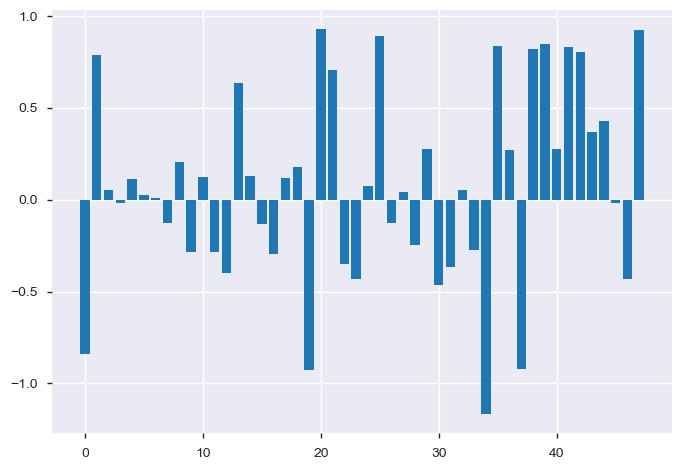

In [ ]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()